# Linear Regression Model 
## - Boom Bikes Sharing Co.

# Reading, Understanding and cleaning the data.

In [3]:
## Importing libraries

import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [4]:
## Importing the data to variable

Raw_Data = pd.read_csv("day.csv")

In [5]:
## Checking the data head

Raw_Data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
## Checking the data tail

Raw_Data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [7]:
# Checking the shape to get the total rows and columns

Raw_Data.shape 

(730, 16)

In [8]:
# Removing all the up blank colums if there is any

Raw_Data.dropna(how='all', axis=1, inplace=True)

# Checking the data shape again
Raw_Data.shape

(730, 16)

Since there was no #N/A cell, there is no change in the data happened.

In [9]:
# Checking the number of Null values in each of the columns by dividing sum of null values with total number of rows
NullPercent=round(((Raw_Data.isnull().sum())/len(Raw_Data.instant))*100)

#Check the fields with more than 30% of Null values
print(NullPercent[NullPercent>30])

Series([], dtype: float64)


In [10]:
## Checking for uniqueness in the data

Raw_Data.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [11]:
# Checking the numerical columns data distribution statistics

Raw_Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
# Creating a copy of original dataframe for duplicate check
Raw_Data_Duplicate = Raw_Data

# Checking for duplicates and dropping the entire duplicate row if any
Raw_Data_Duplicate.drop_duplicates(subset=None, inplace=True)
Raw_Data_Duplicate.shape


(730, 16)

In [13]:
# Renaming few columns for better readibility

Raw_Data.rename(columns={'yr':'Year','mnth':'Month','hum':'Humidity','cnt':'Count','atemp':'TempFeelslike'}, inplace=True)
Raw_Data.describe()

,instant,season,Year,Month,holiday,weekday,workingday,weathersit,temp,TempFeelslike,Humidity,windspeed,casual,registered,Count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [14]:
## Dropping non-required columns as they don't seem valuable for analysis
# Instant doesn't have uniqueness
# The value of dteday is also being carried by Year & month columns
# Count has total value of registered & casual users.

Raw_Data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

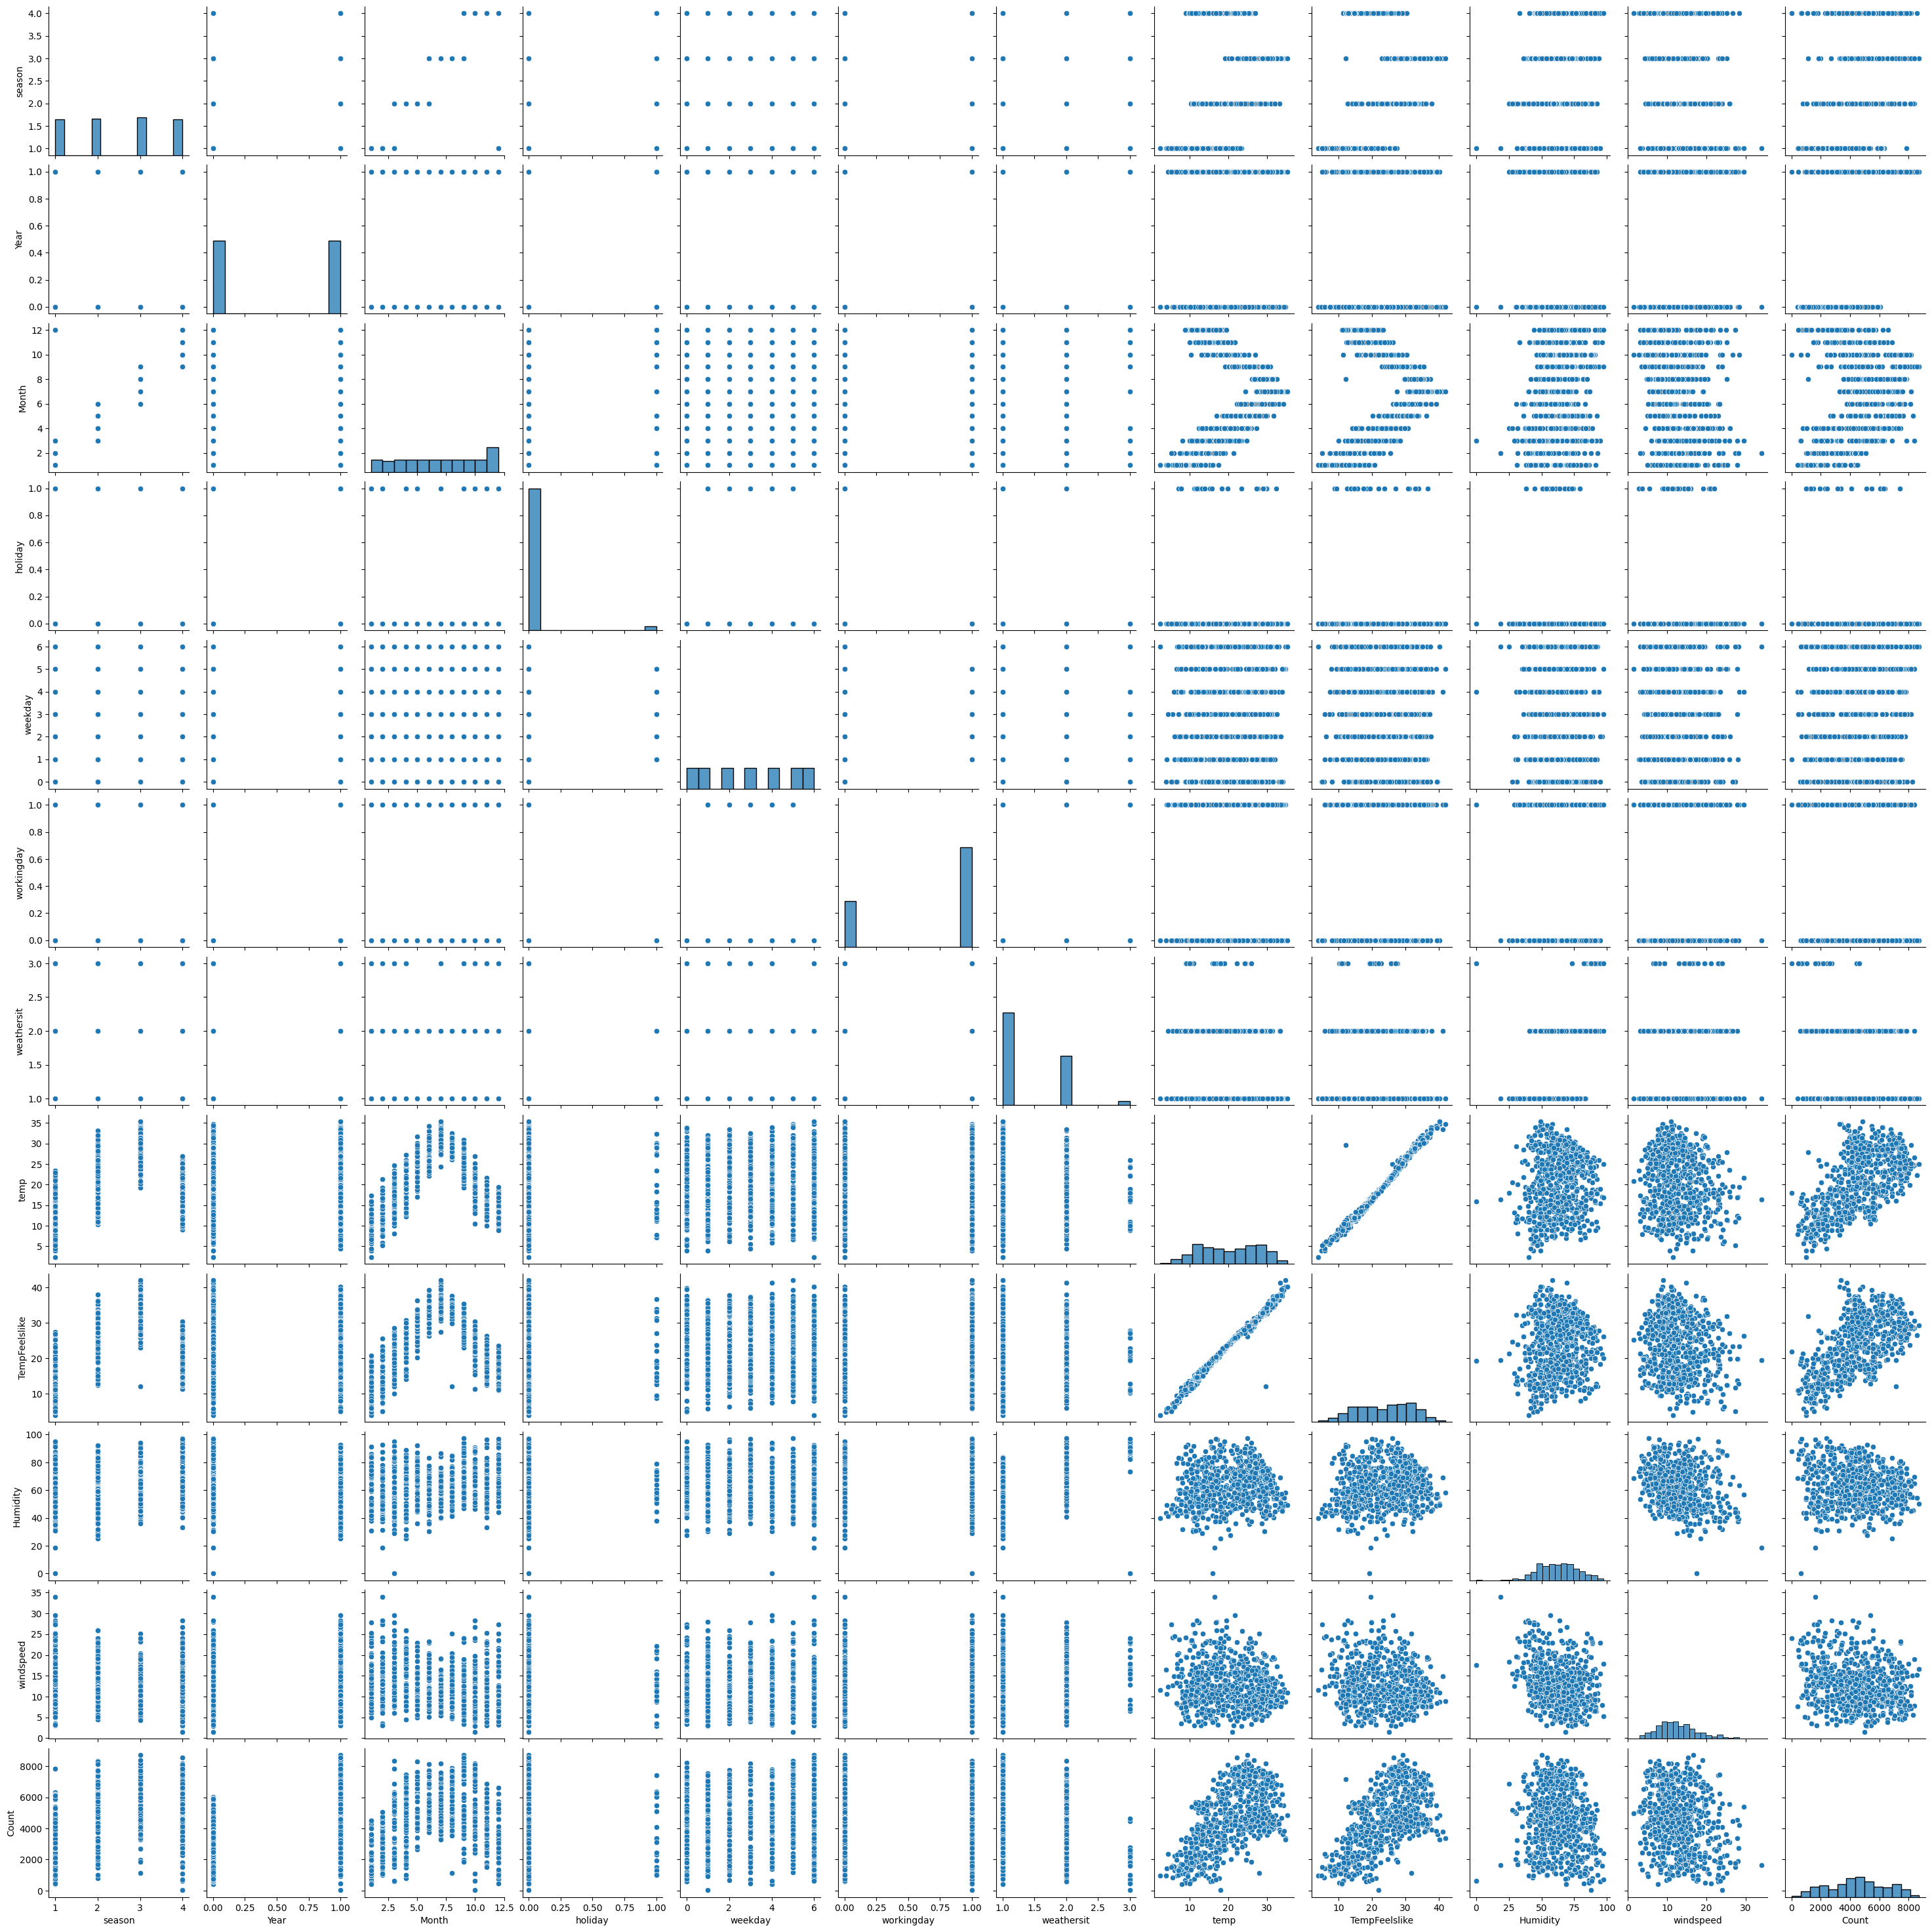

In [15]:
# Visualizing the numberical variables

sns.pairplot(Raw_Data)
plt.show()

### Observations,

With above output, it is visible that temp, TempFeelslike and Count have similar prints on Pair plot.
It can be said that there is a visual relationship are visible alomg these variables.

# Preparing Categorigal Variables

In [16]:
# Updating Season variable from numbers to Season Name

Raw_Data.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
Raw_Data.season.value_counts(normalize=True)

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [17]:
# Updating Month variable from numbers to Month Name

Raw_Data.Month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
Raw_Data.Month.value_counts(normalize=True)

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: Month, dtype: float64

In [18]:
# Updating WeatherSit variable from numbers to Weather Conditions

Raw_Data.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
Raw_Data.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [19]:
# Updating weekday variable from numbers to Day Name

Raw_Data.weekday = Raw_Data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [20]:
## Checking the updated data
Raw_Data.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,TempFeelslike,Humidity,windspeed,Count
0,W1_Spring,0,Jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,W1_Spring,0,Jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,W1_Spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,W1_Spring,0,Jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,W1_Spring,0,Jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
## Checking the update data info
Raw_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   Year           730 non-null    int64  
 2   Month          730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   TempFeelslike  730 non-null    float64
 9   Humidity       730 non-null    float64
 10  windspeed      730 non-null    float64
 11  Count          730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


# Visualizing the data

In [22]:
## To Remove warings from the data sheet
import warnings
warnings.filterwarnings('ignore')

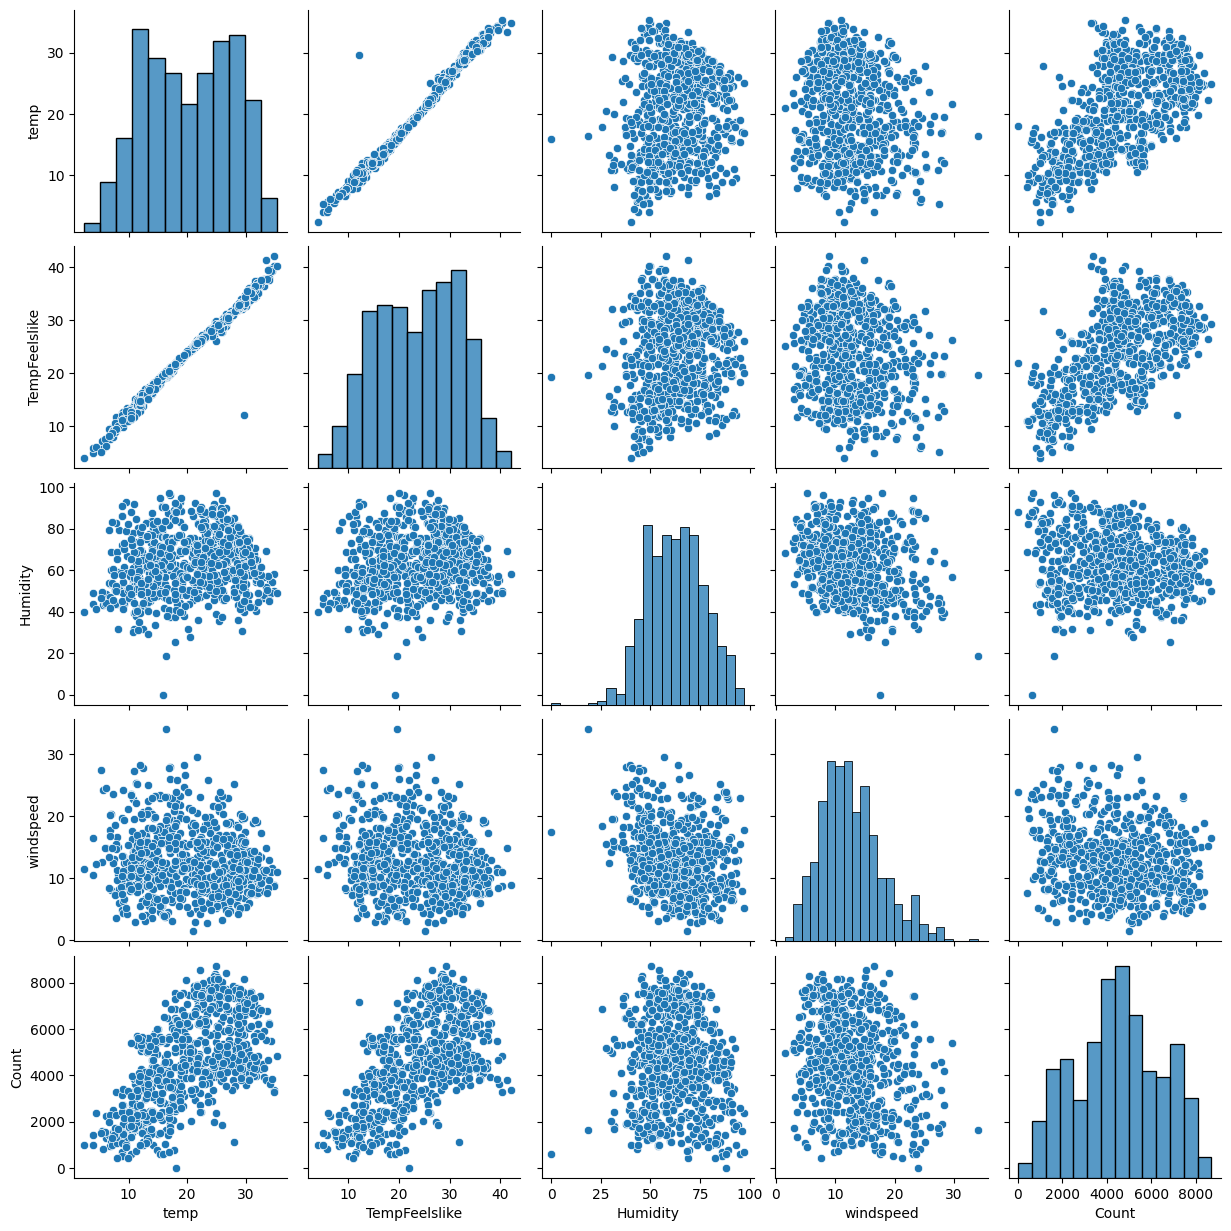

In [23]:
# Prepapering Pair Plot for all Numeric variables
Raw_Data_PP2 = Raw_Data[['temp','TempFeelslike','Humidity','windspeed','Count']]
sns.pairplot(Raw_Data_PP2)
plt.show()

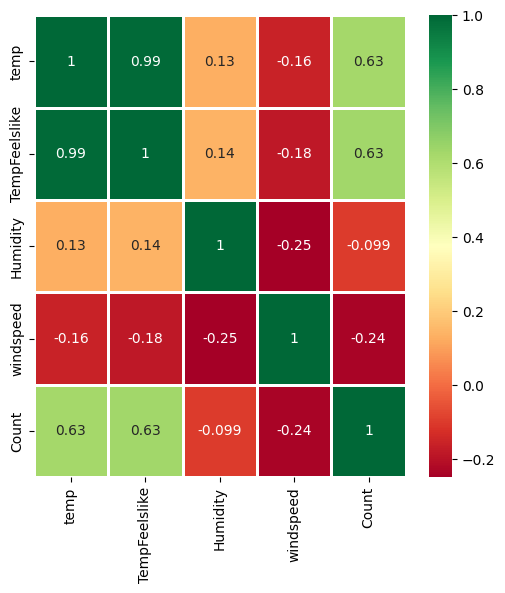

In [24]:
# Prepaping heatmap graph on numberic variables

plt.figure(figsize = (6,6))
ax= sns.heatmap(Raw_Data_PP2.corr(), annot = True, cmap="RdYlGn",linewidth =1)

### Observations

- Temp & TempFeelslike have good correlation with Count of 0.63.
- Temp & TempFeelslike have own correlation of 0.99.
- Humidity has low positive correlation of 0.13 & 0.14 respectively with temp & TempFeelslike

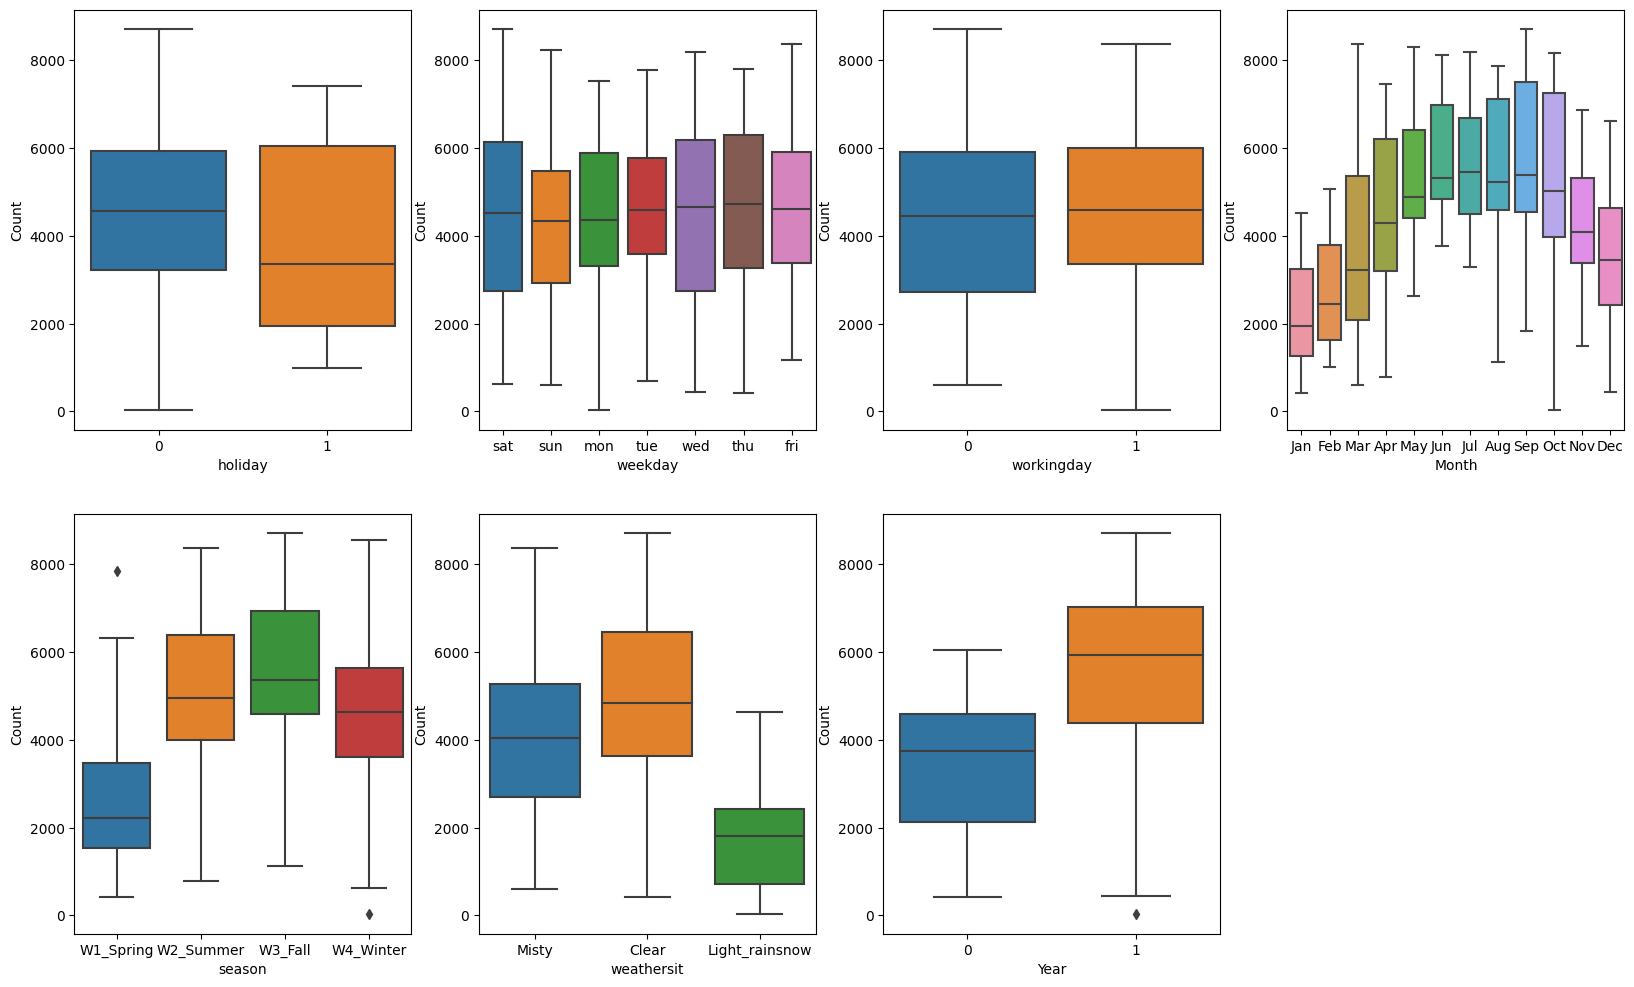

In [25]:
# Visualizing the categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'holiday', y = 'Count', data = Raw_Data)
plt.subplot(2,4,2)
sns.boxplot(x = 'weekday', y = 'Count', data = Raw_Data)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'Count', data = Raw_Data)
plt.subplot(2,4,4)
sns.boxplot(x = 'Month', y = 'Count', data = Raw_Data)
plt.subplot(2,4,5)
sns.boxplot(x = 'season', y = 'Count', data = Raw_Data)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'Count', data = Raw_Data)
plt.subplot(2,4,7)
sns.boxplot(x = 'Year', y = 'Count', data = Raw_Data)
plt.show()

### Observations
- With above box plots, multiple info is visible.
- In holiday, Holiday attractes more business compared to Non-Holiday.
- In weekday, Sat & Wed are biggest contributer to volumes.
- In workday, Non-working day attractes more business and it also visible in holiday as well
- In Month, it is visible the business has a season period starting from end of Mar until Nov & Dec. And Jan,feb, Mar are off-season period for the business
- In season, W1_Spring has lowest volumes and rest season do more then average.
- In weathersit, it can be seen the weathersit an important factor. If it Clear or Misty, volume grows but during rain & snow, volumes drops to lowest.
- In year, the company's Year on Year growth is visible as 2019 has more volume compared to 2018.

Text(0.5, 0, 'Count')

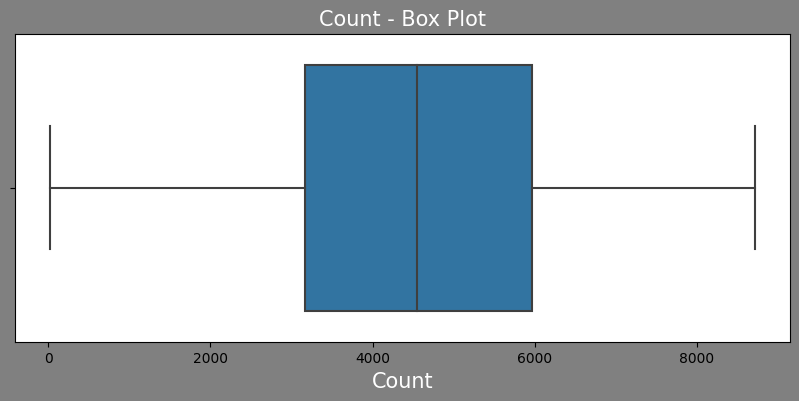

In [26]:
# Visualizing the Count variable to understand business turnover

plt.figure(figsize=(10,4),facecolor='grey')

Count_b_plot = sns.boxplot(x=Raw_Data['Count'])
Count_b_plot.set_title('Count - Box Plot',fontsize=15,color='w')
Count_b_plot.set_xlabel('Count',fontsize=15,color='w')

- On an average the volume stays above 4000 counts.

Text(0, 0.5, 'Count')

<Figure size 2000x2000 with 0 Axes>

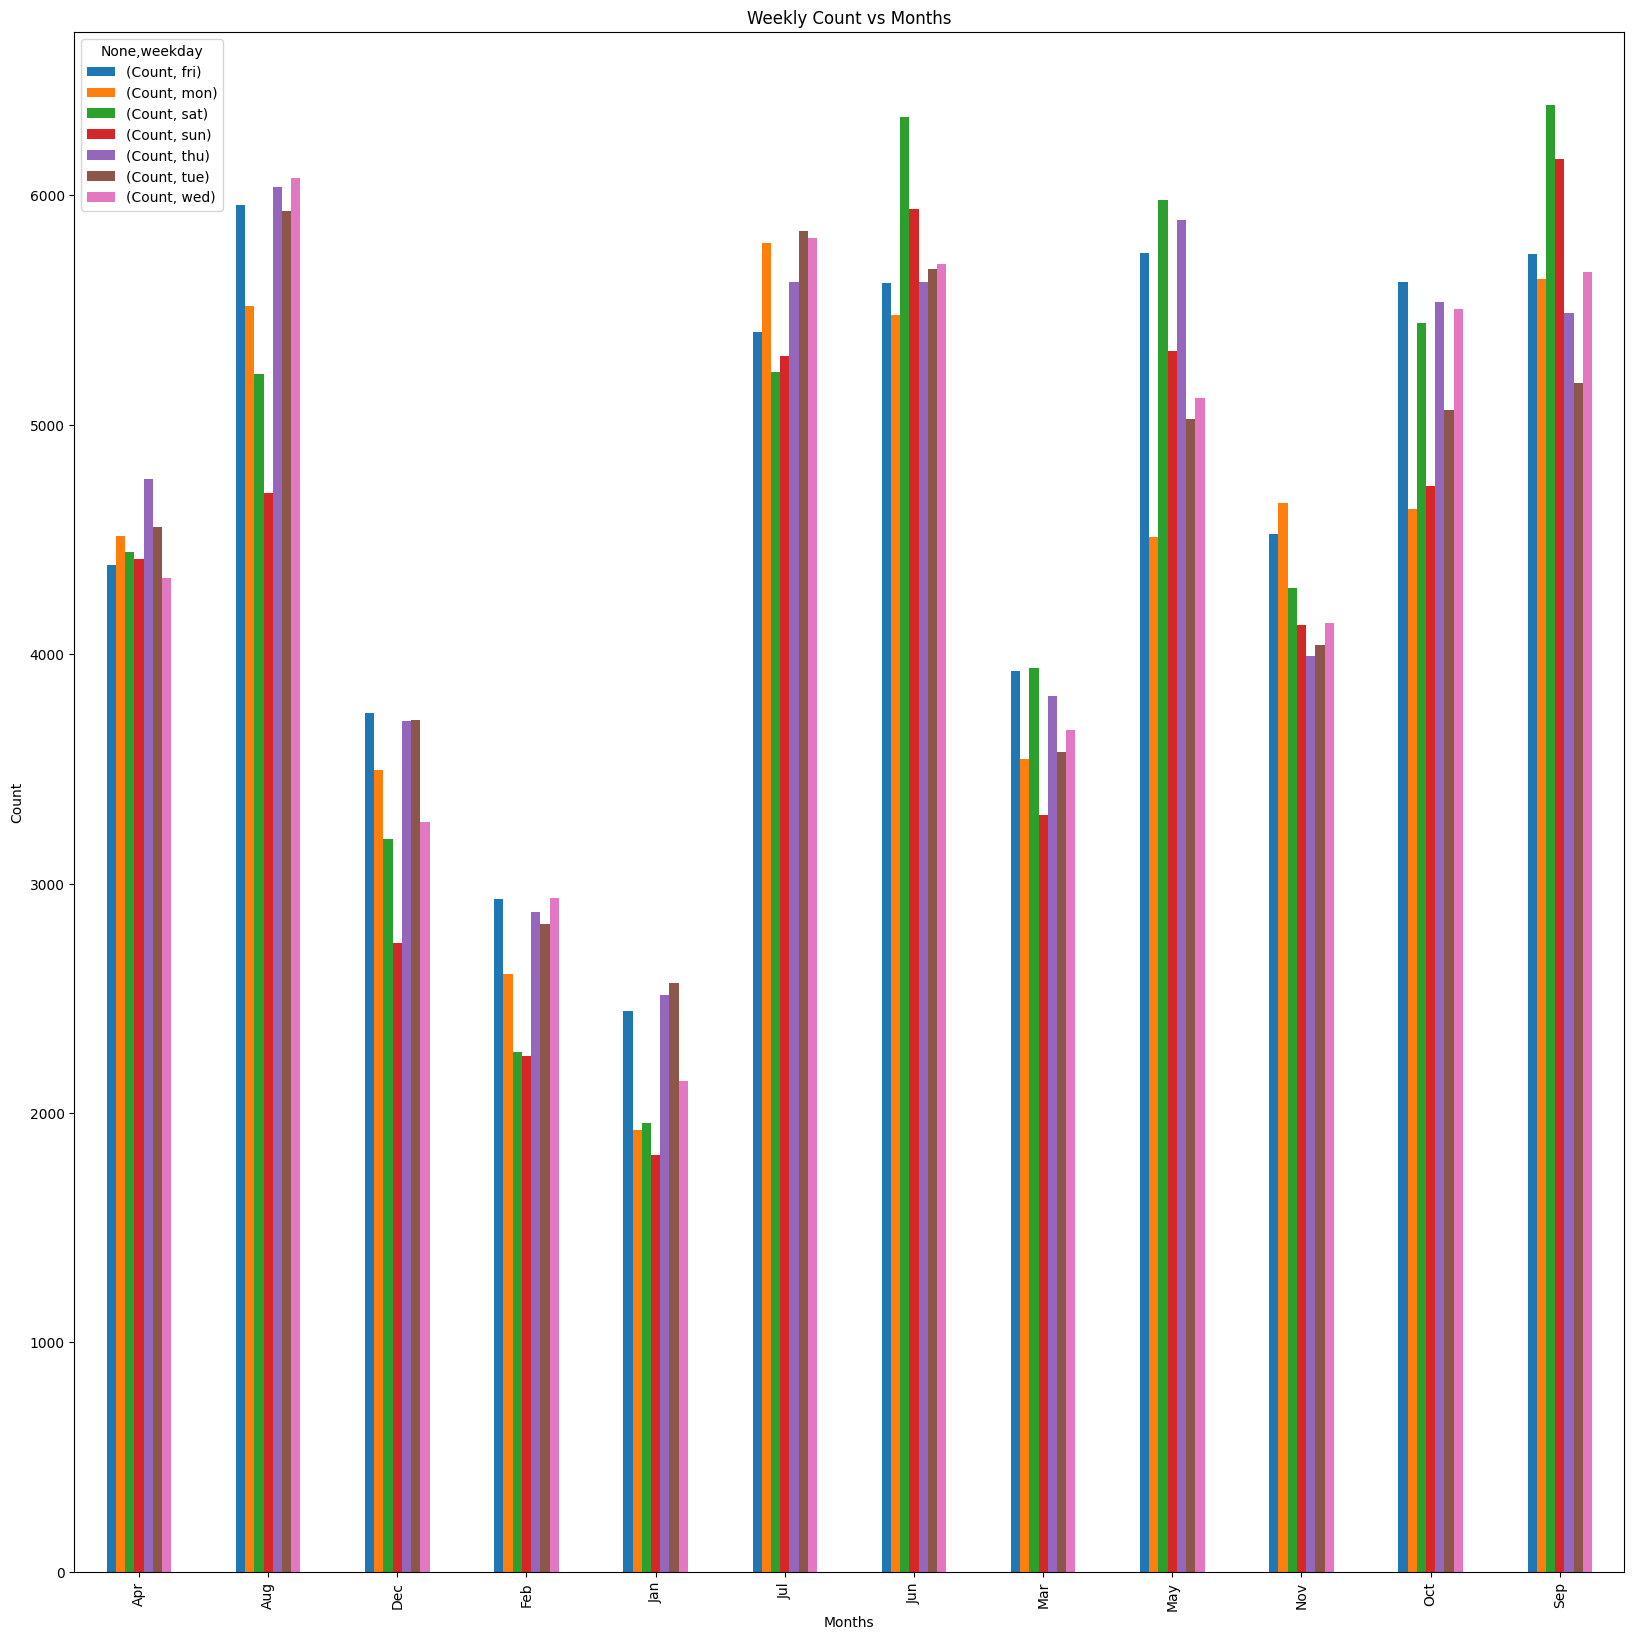

In [27]:
## Update Plot screen size
plt.rcParams["figure.figsize"]=20,20 #This to increase the visual output screensize.

## Below Pivot Table will help us with Revenve distribution against Month & Weekday

Bar1=pd.pivot_table(Raw_Data, index=['Month'], columns=['weekday'], values=['Count'], aggfunc='mean')
Bar1

plt.figure(figsize=(20,20),facecolor='grey'); Bar1.plot.bar(title='Weekly Count vs Months'); plt.xlabel('Months'); plt.ylabel('Count')

- Top charts are from Aug, Jul, Jun, May, Oct and Sep
- In Aug, web, thu and fri peaks the count
- In Jul, mon, tue and wed peaks the count
- In Jun, sat and sun peaks the count
- In May, thu, fri, sat peaks the count
- In Oct, thu and fri peaks the count
- In Sep, sat and sun peaks the count

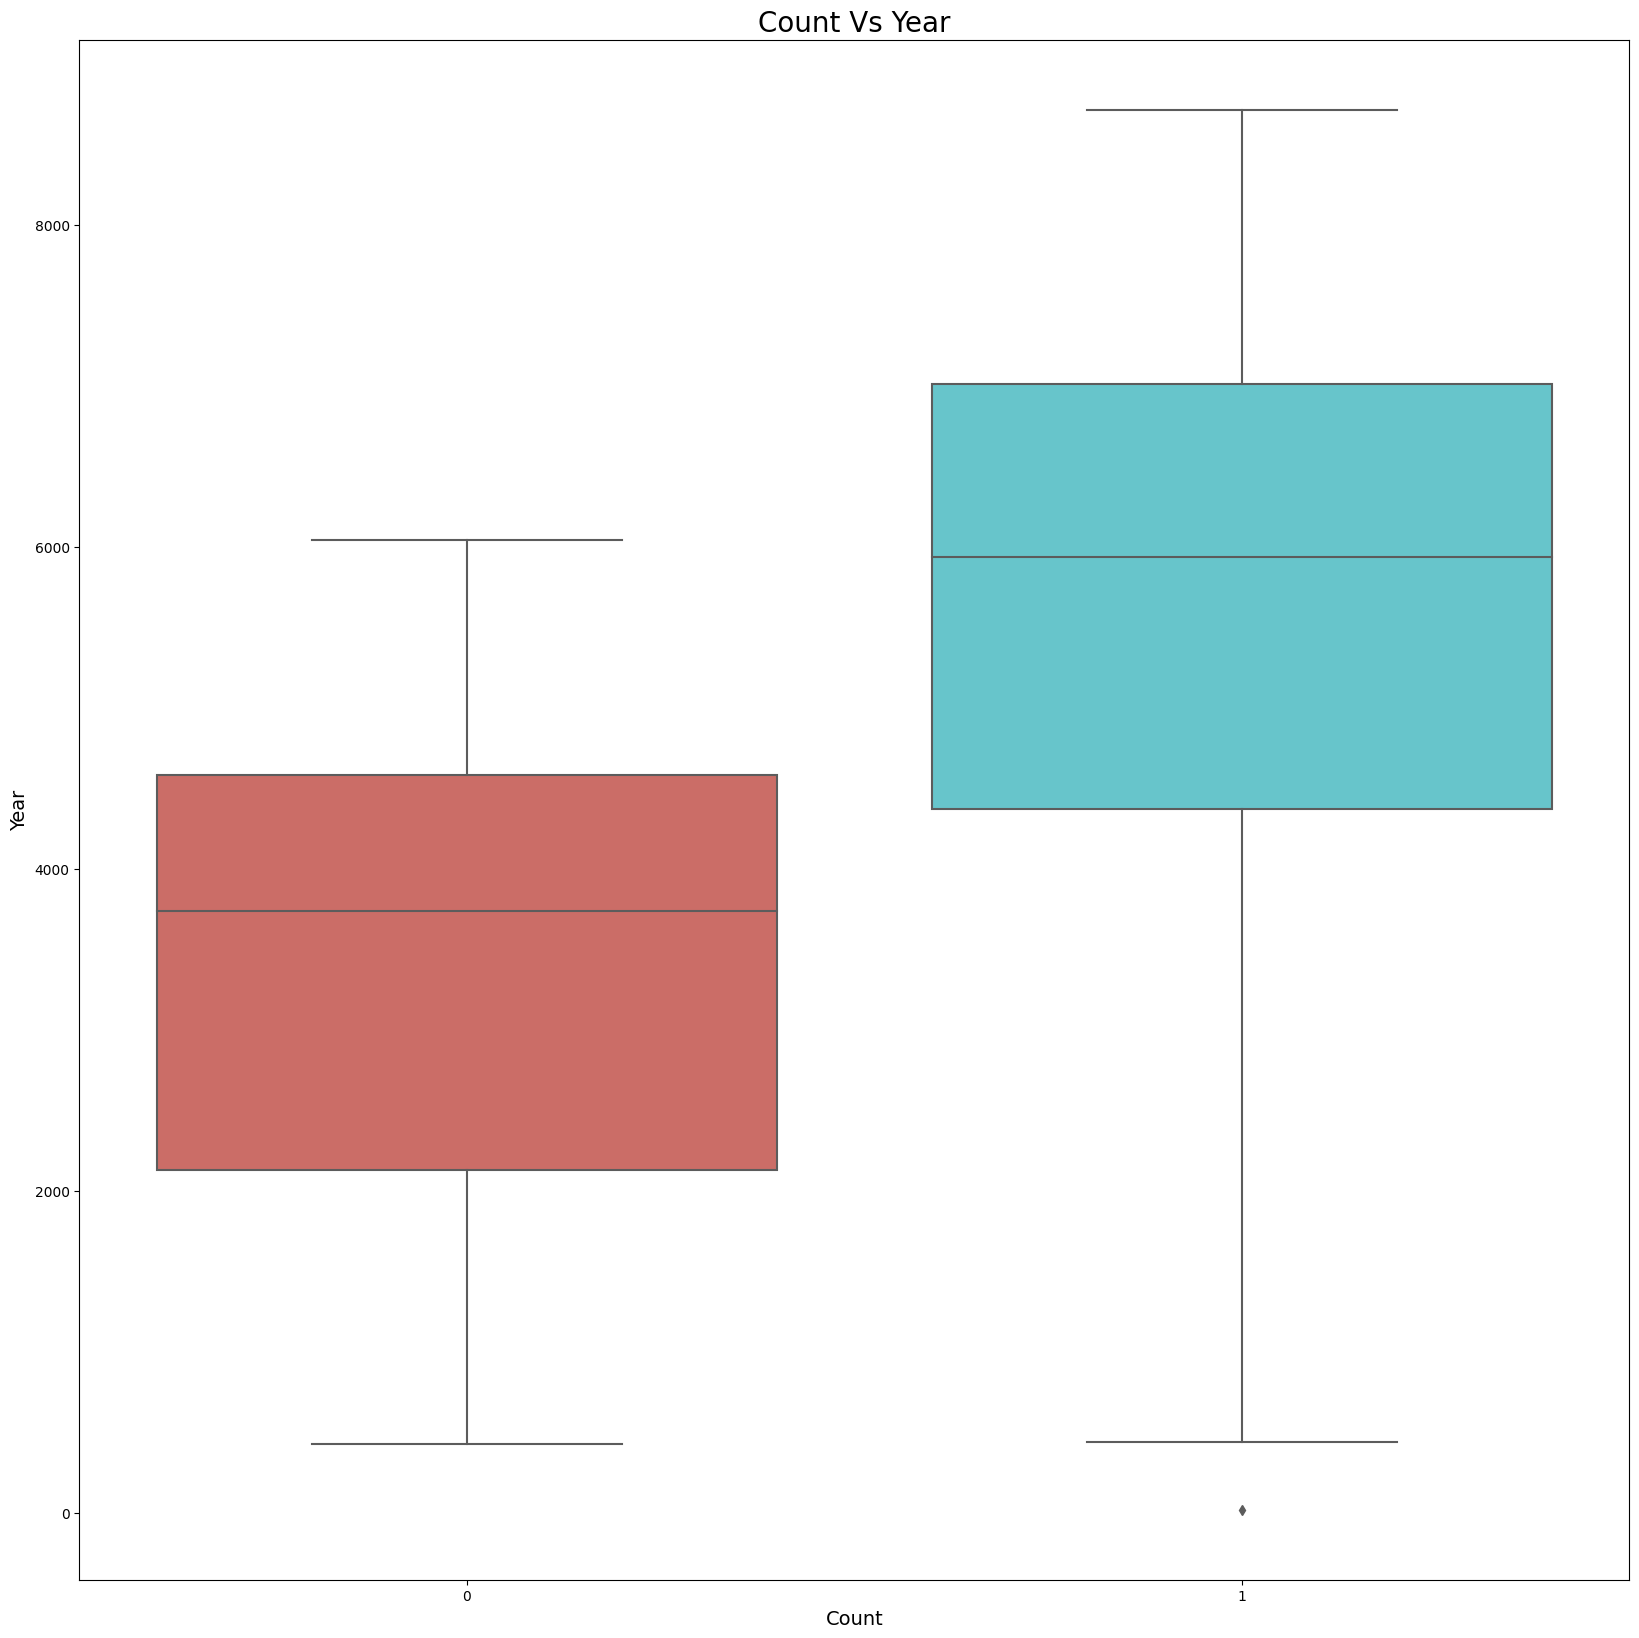

In [28]:
## Below plot graph to find Year On Year performance differnce

sns.boxplot(x="Year",y="Count", data=Raw_Data,palette="hls")
plt.xlabel("Count", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.title("Count Vs Year", fontsize=20)

plt.show()

- Business has grown in 2019 compared to 2018

In [29]:
# Function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = Raw_Data.groupby(col)['Count'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/Raw_Data.Count.sum()*100
    cat_df['count_perc']=cat_df['count']/Raw_Data.Count.count()*100
    return round(cat_df,2)

In [30]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'Count',data=Raw_Data)
    plt.subplot(1,2,2)
    sns.barplot(col,'Count',data=Raw_Data, hue='Year',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

In [31]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
W3_Fall,1061129,5644.30,188,32.24,25.75
W2_Summer,918589,4992.33,184,27.91,25.21
W4_Winter,841613,4728.16,178,25.57,24.38
W1_Spring,469514,2608.41,180,14.27,24.66


TypeError: barplot() got multiple values for argument 'data'

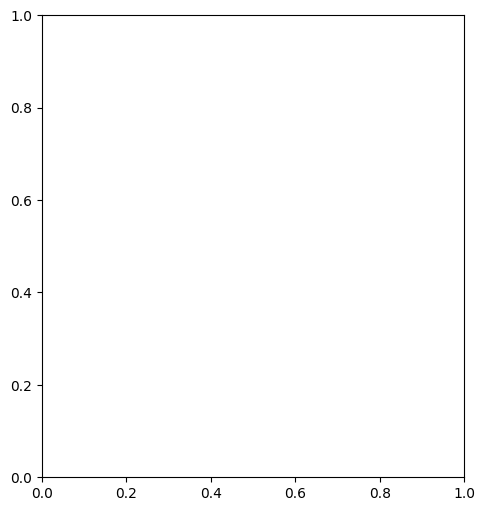

In [32]:
categorical_plot('season',12,6)

- The volume pattern is same in both year's season but overall count has increased in 2019.

In [ ]:
categorical_stats('Month')

,sum,mean,count,sum_perc,count_perc
Month,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


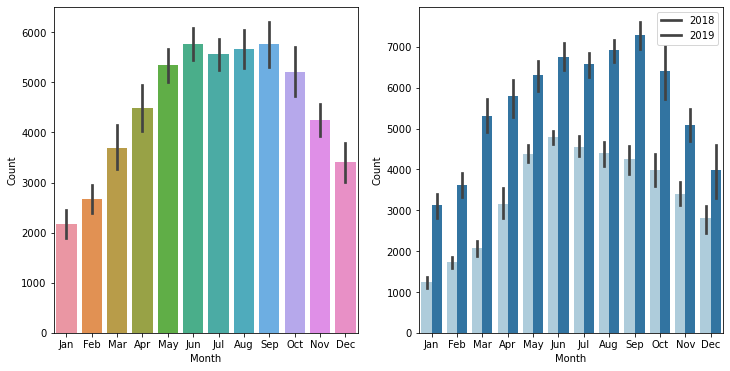

In [ ]:
categorical_plot('Month',12,6)

- The volume pattern is same in both year's months but overall count has increased in 2019.

In [ ]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


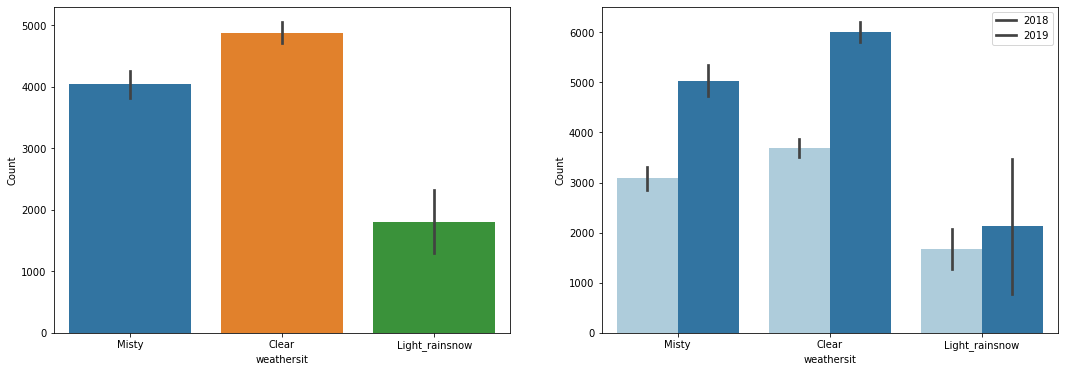

In [ ]:
categorical_plot('weathersit',18,6)

- The volume pattern is same in both year's weathersit but overall count has increased in 2019.

In [ ]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
fri,487790,4690.29,104,14.82,14.25
thu,485395,4667.26,104,14.75,14.25
sat,477807,4550.54,105,14.52,14.38
wed,471214,4574.89,103,14.32,14.11
tue,469109,4510.66,104,14.25,14.25
mon,455503,4338.12,105,13.84,14.38
sun,444027,4228.83,105,13.49,14.38


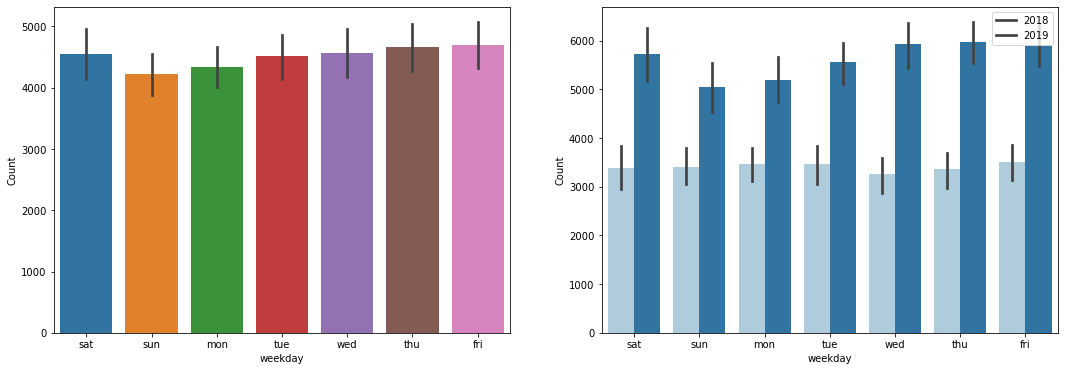

In [ ]:
categorical_plot('weekday',18,6)

- The volume pattern has changes in both year's weekdaybut overall count has increased in 2019.

In [ ]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


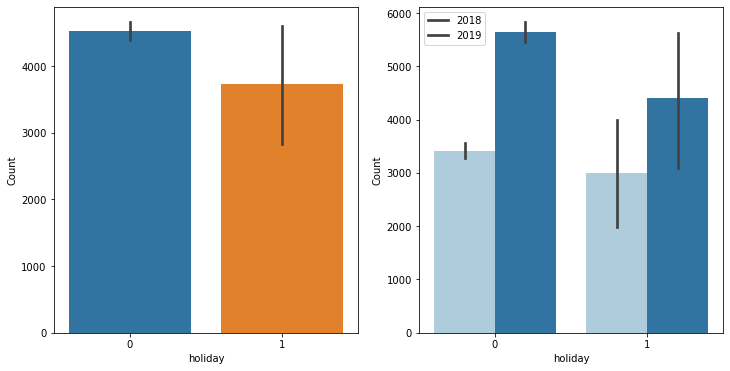

In [ ]:
categorical_plot('holiday',12,6)

- The volume pattern is same in both year's holiday but overall count has increased in 2019.

In [ ]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


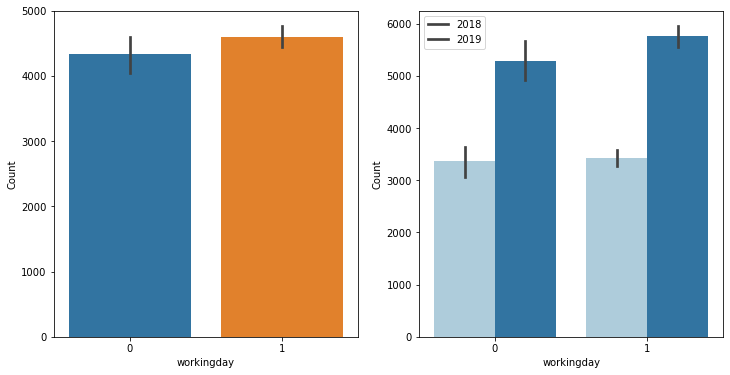

In [ ]:
categorical_plot('workingday',12,6)

- The volume pattern is same in both year's workingday but overall count has increased in 2019.

In [ ]:
categorical_stats('Year')

,sum,mean,count,sum_perc,count_perc
Year,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


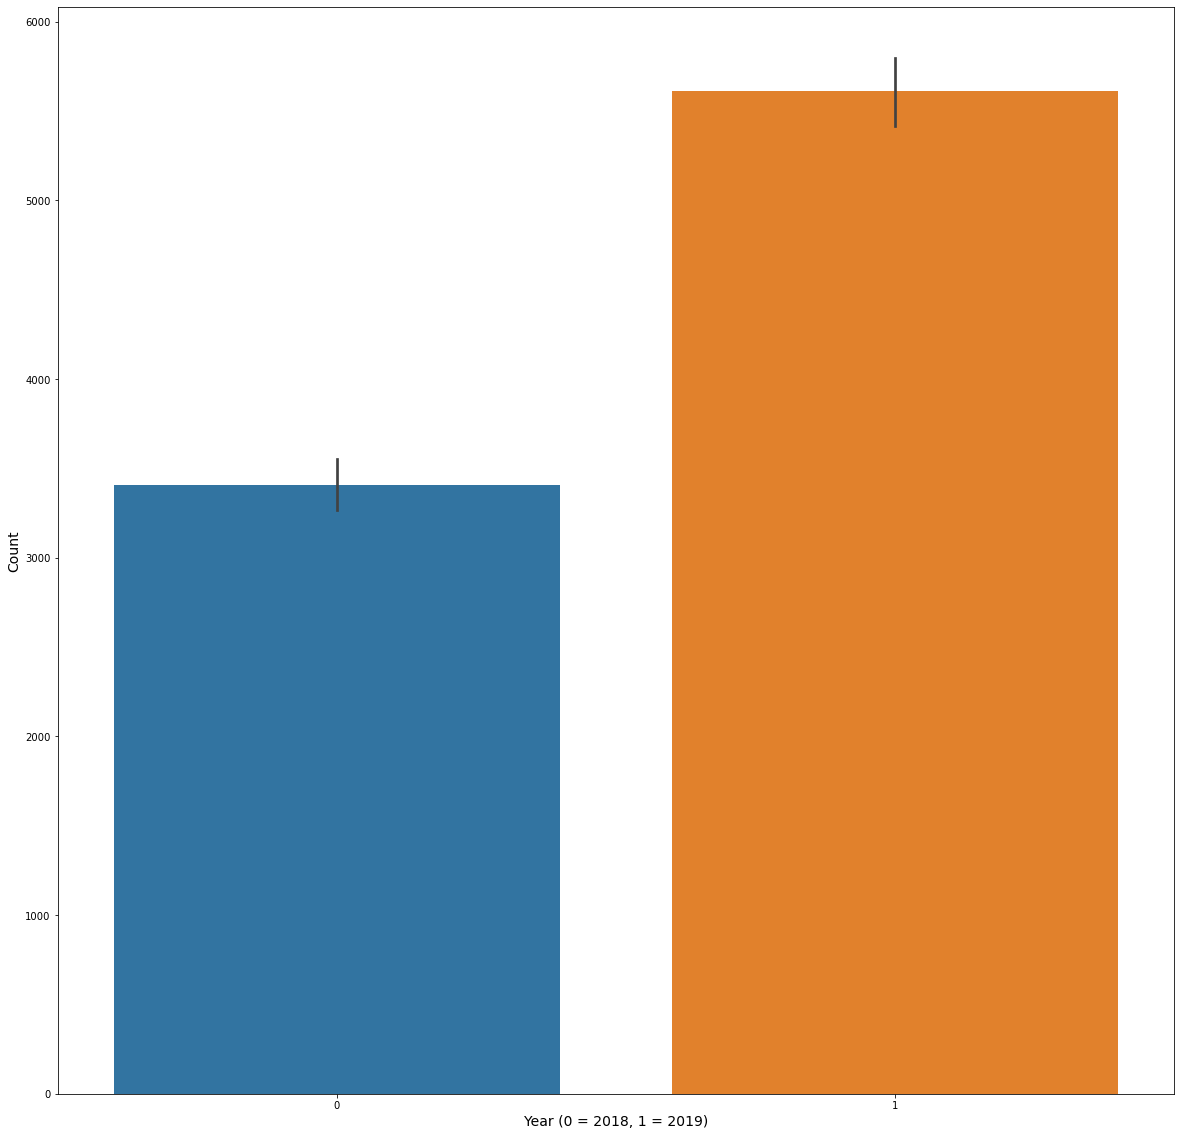

In [ ]:
sns.barplot('Year','Count',data=Raw_Data)
plt.xlabel("Year (0 = 2018, 1 = 2019)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

# Data Preparation

In [ ]:
# Creating Dummy variable of Categorical variables like Month, weekday, weathersit and season.
# This is to make the variables numeric for test & train purposes.

Raw_Data_Month=pd.get_dummies(Raw_Data.Month,drop_first=True)
Raw_Data_weekday=pd.get_dummies(Raw_Data.weekday,drop_first=True)
Raw_Data_weathersit=pd.get_dummies(Raw_Data.weathersit,drop_first=True)
Raw_Data_season=pd.get_dummies(Raw_Data.season,drop_first=True)

In [ ]:
# Checking Month Dummy Variable
Raw_Data_Month.head(5)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Checking Weekday Dummy Variable

Raw_Data_weekday.head(5)

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [ ]:
# Checking WeatherSit Dummy Variable

Raw_Data_weathersit.head(5)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [ ]:
# Checking Season Dummy Variable

Raw_Data_season.head(5)

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
# Creating New Data Variable and we will mergering dummy variables into it.

Data_New = pd.concat([Raw_Data,Raw_Data_season,Raw_Data_Month,Raw_Data_weathersit,Raw_Data_weekday], axis = 1)

# Checking columns with fist 5 data row values
Data_New.head(5)

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,TempFeelslike,Humidity,...,Oct,Sep,Light_rainsnow,Misty,mon,sat,sun,thu,tue,wed
0,W1_Spring,0,Jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,W1_Spring,0,Jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,W1_Spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,W1_Spring,0,Jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,W1_Spring,0,Jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Checking columns of new data set

Data_New.columns

Index(['season', 'Year', 'Month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'TempFeelslike', 'Humidity', 'windspeed', 'Count',
       'W2_Summer', 'W3_Fall', 'W4_Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Light_rainsnow', 'Misty',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [ ]:
# Checking data before removing cleanup

Data_New.info(), Data_New.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   Year            730 non-null    int64  
 2   Month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   TempFeelslike   730 non-null    float64
 9   Humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  Count           730 non-null    int64  
 12  W2_Summer       730 non-null    uint8  
 13  W3_Fall         730 non-null    uint8  
 14  W4_Winter       730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

(None, (730, 34))

In [ ]:
# Removing Categorical Variables as their values have added as dummy variables

Data_New.drop(['season','Month','weathersit','weekday'],axis=1,inplace=True)

# Checking data again after removal of variables
Data_New.info(), Data_New.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   TempFeelslike   730 non-null    float64
 5   Humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   Count           730 non-null    int64  
 8   W2_Summer       730 non-null    uint8  
 9   W3_Fall         730 non-null    uint8  
 10  W4_Winter       730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

(None, (730, 30))

# Spliting the data for Train & Test

In [ ]:
# Data Spliting

Data_New_train, Data_New_test = train_test_split(Data_New, train_size = 0.7, random_state=100)

# Printing Data shape post slpit

print(Data_New_train.shape)
print(Data_New_test.shape)

(510, 30)
(220, 30)


In [ ]:
# Checking the train data

Data_New_train.describe()

,Year,holiday,workingday,temp,TempFeelslike,Humidity,windspeed,Count,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.247059,0.262745,...,0.084314,0.080392,0.029412,0.345098,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.431725,0.440557,...,0.278131,0.272166,0.169124,0.475867,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Checking the test data

Data_New_test.describe()

,Year,holiday,workingday,temp,TempFeelslike,Humidity,windspeed,Count,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,mon,sat,sun,thu,tue,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,20.808400,24.250312,61.934025,12.598352,4560.559091,0.263636,0.245455,...,0.086364,0.086364,0.027273,0.318182,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,7.672796,8.281075,14.429542,4.973534,1904.968544,0.441609,0.431338,...,0.281541,0.281541,0.163248,0.466833,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Scaling the Variables\Features

In [ ]:
# Normalization

# 1. Instantiate\Create an object
scaler = MinMaxScaler()

# Create a list of numeric variables(except Dummy)
num_var = ['temp','TempFeelslike','Humidity','windspeed','Count']


# 2. Fit the data
Data_New_train[num_var] = scaler.fit_transform(Data_New_train[num_var])

Data_New_train.head()

,Year,holiday,workingday,temp,TempFeelslike,Humidity,windspeed,Count,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,1,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,1,0,0,0,0,0,0


# Training the Model 

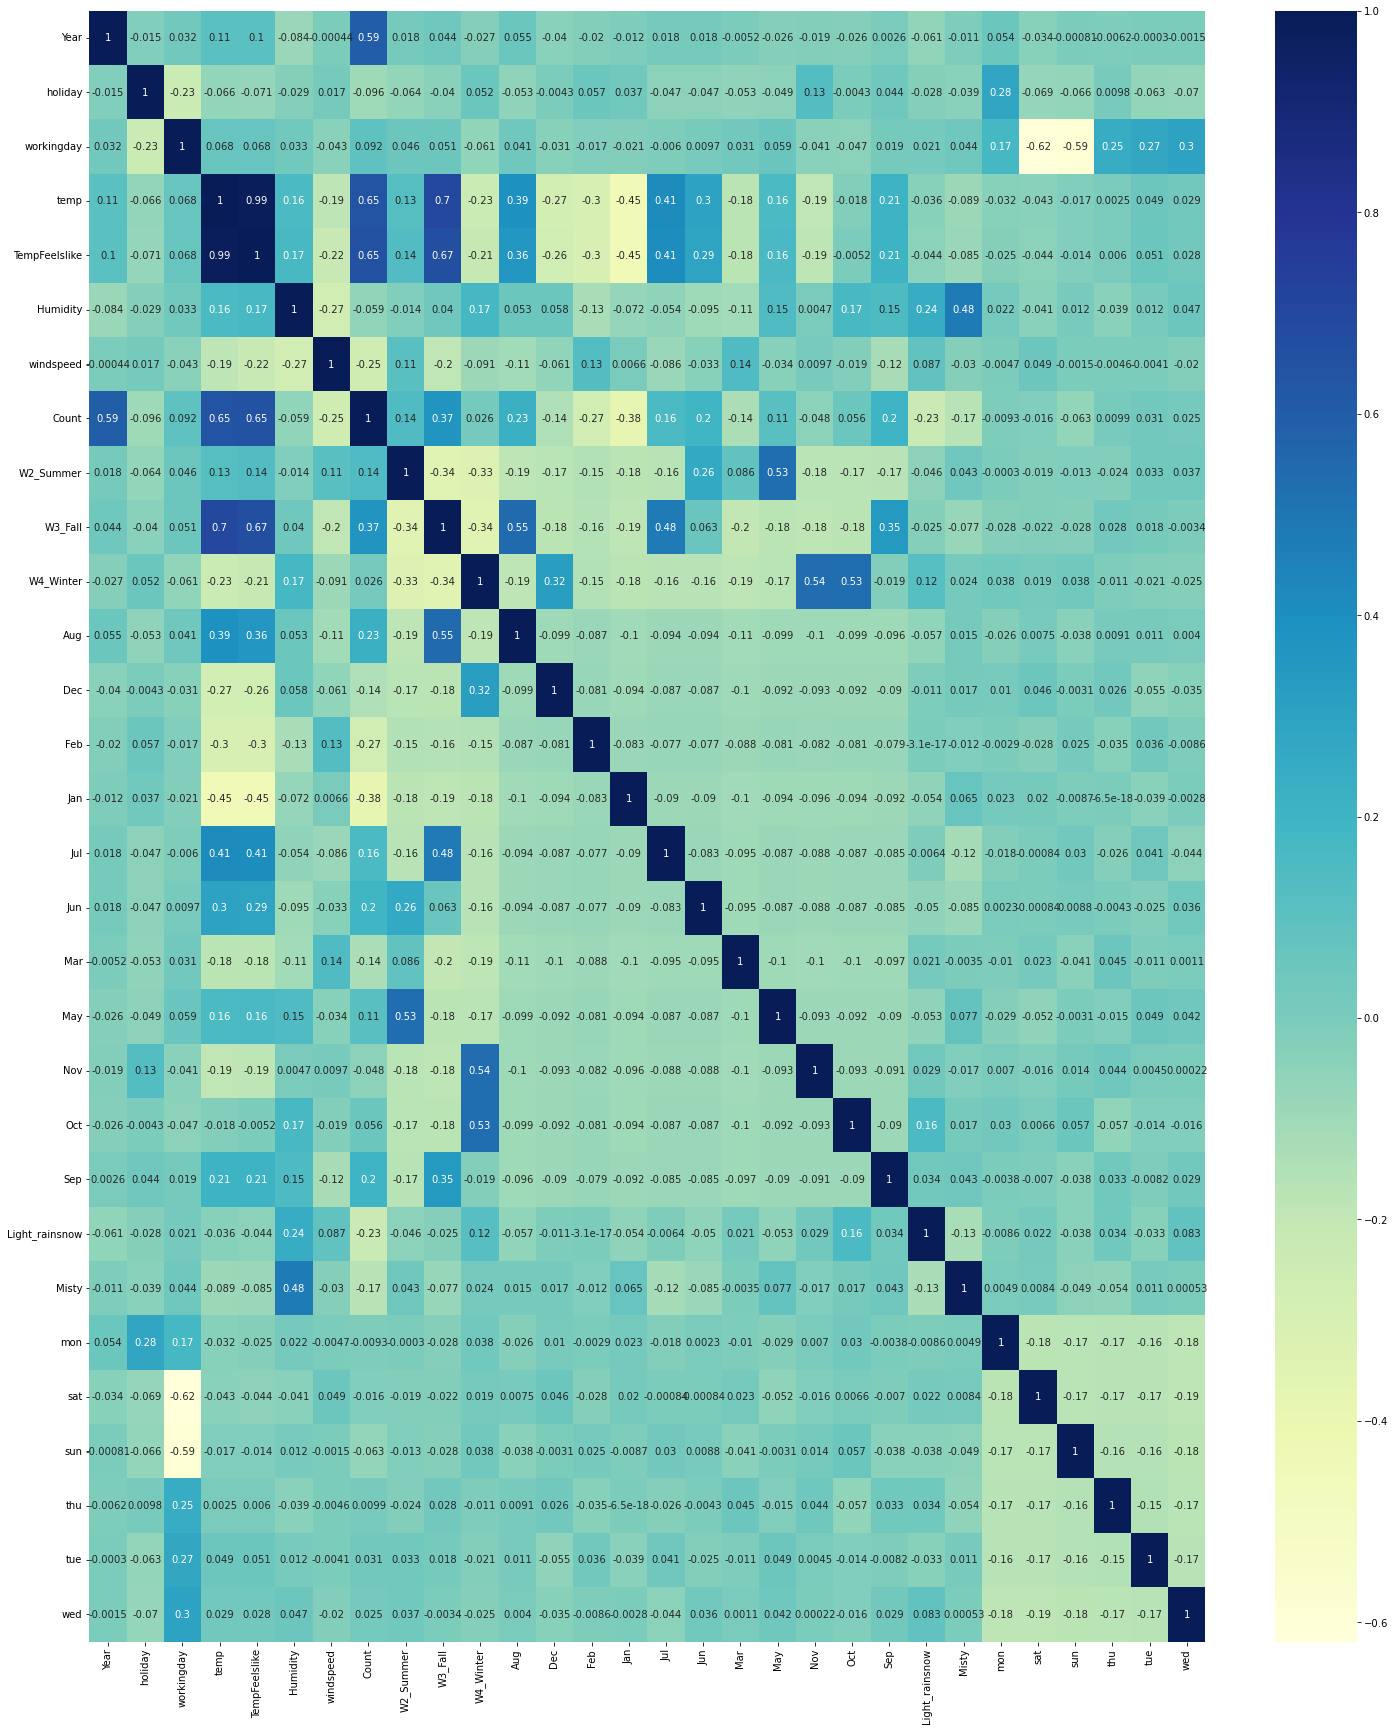

In [ ]:
# Creating Headmap
plt.figure(figsize = (25,30))
sns.heatmap(Data_New_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

## Observations
1. Temp & TempFeelslike have highest correlation of 0.99, we can use one of them without second thought.
2. Temp has 0.7 correlation with W3_Fall and TempFeelslike has 0.67 with W3_Fall
3. Temp & TempFeelslike have 0.65 correlation with Count.
4. Sat & Sun have negative correlation of 0.62 & 0.59 respectively with workingday
5. Count has good correlation of 0.59 with Year.
6. Correlation grows between May and Nov months and rest of months have low correlation.

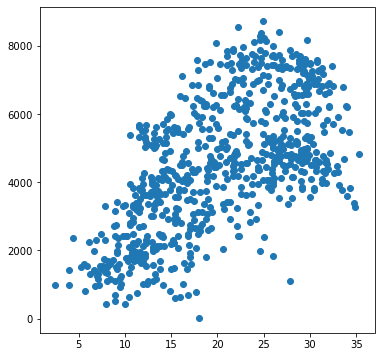

In [ ]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(Data_New.temp, Data_New.Count)
plt.show()

### Technic 1, 
- Add variables one by one and see the difference
- We will start with One variable then later add other variables
- Starting with Count bcoz it is most correlated

In [ ]:
# X_train, y_train
y_train = Data_New_train.pop('Count')
X_train = Data_New_train

In [ ]:
# Add a constant

X_train_sm = sm.add_constant(X_train['temp'])

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Parameters
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           2.46e-61
Time:                        21:20:12   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# add another variable TempFeelslike

X_train_sm = X_train[['temp','TempFeelslike']]
X_train_sm = sm.add_constant(X_train_sm)

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           8.38e-61
Time:                        21:21:26   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1627      0.020      8.198      0.000       0.124       0.202
temp              0.1853      0.233      0.796      0.426      -0.272       0.643
TempFeelslike     0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# add another variable W3_Fall & Count

X_train_sm = X_train[['temp','TempFeelslike','W3_Fall']]
X_train_sm = sm.add_constant(X_train_sm)

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     127.2
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           2.12e-61
Time:                        21:25:32   Log-Likelihood:                 182.20
No. Observations:                 510   AIC:                            -356.4
Df Residuals:                     506   BIC:                            -339.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1317      0.022      5.870      0.000       0.088       0.176
temp              0.4124      0.244      1.689      0.092      -0.067       0.892
TempFeelslike     0.3479      0.251      1.388      0.166      -0.145       0.840
W3_Fall          -0.0701      0.024     -2.881      0.004      -0.118      -0.022
==============================================================================
Omnibus:                        5.325   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                3.824
Skew:                           0.060   Prob(JB):                        0.148
Kurtosis:                       2.593   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Technic 2,
- All variables in one go and remove one variable at a time

In [ ]:
Data_New.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'TempFeelslike', 'Humidity',
       'windspeed', 'Count', 'W2_Summer', 'W3_Fall', 'W4_Winter', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Light_rainsnow', 'Misty', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [ ]:
# Building all variables with all the variables
X_train_sm = sm.add_constant(X_train)

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.81e-180
Time:                        21:27:15   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2070      0.033      6.214      0.000       0.142       0.272
Year               0.2325      0.008     28.794      0.000       0.217       0.248
holiday            0.0018      0.024      0.076      0.939      -0.045       0.049
workingday         0.0872      0.012      7.200      0.000       0.063       0.111
temp               0.3880      0.142      2.727      0.007       0.108       0.668
TempFeelslike      0.0590      0.138      0.426      0.670      -0.213       0.331
Humidity          -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed         -0.1836      0.026     -6.962      0.000      -0.235      -0.132
W2_Summer          0.0877      0.024      3.713      0.000       0.041       0.134
W3_Fall            0.0454      0.030      1.511      0.131      -0.014       0.104
W4_Winter          0.1524      0.026      5.866      0.000       0.101       0.203
Aug                0.0223      0.034      0.657      0.511      -0.044       0.089
Dec               -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb               -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan               -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul               -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun                0.0060      0.025      0.241      0.810      -0.043       0.055
Mar                0.0016      0.025      0.063      0.950      -0.047       0.050
May                0.0255      0.021      1.208      0.228      -0.016       0.067
Nov               -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct                0.0077      0.036      0.215      0.830      -0.063       0.078
Sep                0.0868      0.032      2.711      0.007       0.024       0.150
Light_rainsnow    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Misty             -0.0595      0.010     -5.701      0.000      -0.080      -0.039
mon               -0.0216      0.015     -1.401      0.162      -0.052       0.009
sat                0.0861      0.013      6.424      0.000       0.060       0.112
sun                0.0319      0.014      2.322      0.021       0.005       0.059
thu               -0.0097      0.016     -0.623      0.534      -0.040       0.021
tue               -0.0184      0.016     -1.184      0.237      -0.049       0.012
wed               -0.0059      0.015     -0.394      0.694      -0.035       0.023
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                   

## Notes

- If P Value of any variable is above 0.5 will be considered high
- Below options are helpful to decide which variable to drop

- Significance (p-values)
- VIF

In [ ]:
# Checking VIF
# Create a dataframe that will contain the names of all the feature variables and their respect.
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,workingday,77.02
3,temp,66.90
4,TempFeelslike,56.03
24,sat,17.46
25,sun,16.41
8,W3_Fall,11.33
9,W4_Winter,8.15
18,Nov,6.79
7,W2_Summer,6.74
19,Oct,6.47


### Scenarios we could use to decide to drop which variables
- High p-value, high VIF
- High-low:
    - High p, low VIF: remove these first
    - Low p, high VIF: remove these after the ones above
- Low p, Low VIF

In [ ]:
# Creating another seperate model after remove "holiday"
X = X_train.drop('holiday', axis=1)

In [ ]:
# Building all variables without "Semi-furnished" all the variables
X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.81e-180
Time:                        21:39:04   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2088      0.050      4.188      0.000       0.111       0.307
Year               0.2325      0.008     28.794      0.000       0.217       0.248
workingday         0.0854      0.027      3.196      0.001       0.033       0.138
temp               0.3880      0.142      2.727      0.007       0.108       0.668
TempFeelslike      0.0590      0.138      0.426      0.670      -0.213       0.331
Humidity          -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed         -0.1836      0.026     -6.962      0.000      -0.235      -0.132
W2_Summer          0.0877      0.024      3.713      0.000       0.041       0.134
W3_Fall            0.0454      0.030      1.511      0.131      -0.014       0.104
W4_Winter          0.1524      0.026      5.866      0.000       0.101       0.203
Aug                0.0223      0.034      0.657      0.511      -0.044       0.089
Dec               -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb               -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan               -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul               -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun                0.0060      0.025      0.241      0.810      -0.043       0.055
Mar                0.0016      0.025      0.063      0.950      -0.047       0.050
May                0.0255      0.021      1.208      0.228      -0.016       0.067
Nov               -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct                0.0077      0.036      0.215      0.830      -0.063       0.078
Sep                0.0868      0.032      2.711      0.007       0.024       0.150
Light_rainsnow    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Misty             -0.0595      0.010     -5.701      0.000      -0.080      -0.039
mon               -0.0216      0.015     -1.401      0.162      -0.052       0.009
sat                0.0843      0.030      2.779      0.006       0.025       0.144
sun                0.0301      0.030      0.989      0.323      -0.030       0.090
thu               -0.0097      0.016     -0.623      0.534      -0.040       0.021
tue               -0.0184      0.016     -1.184      0.237      -0.049       0.012
wed               -0.0059      0.015     -0.394      0.694      -0.035       0.023
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                         92.5
================================

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respect.
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,436.98
3,TempFeelslike,383.44
4,Humidity,38.87
1,workingday,22.11
7,W3_Fall,14.62
8,W4_Winter,10.74
9,Aug,7.11
6,W2_Summer,7.07
23,sat,6.43
18,Oct,6.31


In [ ]:
# Droping "temp" variable as it has high p-value & VIF
X = X_train.drop('temp', axis=1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respect.
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,workingday,75.93
23,sat,17.32
24,sun,16.28
7,W3_Fall,11.26
8,W4_Winter,8.15
17,Nov,6.76
6,W2_Summer,6.74
18,Oct,6.47
9,Aug,6.18
3,TempFeelslike,5.93


## Observations
- Upon removing Holiday & Temp variable helped us reducing the VIF values and Adjusted R2 stayed stable.
- Let's try RFE technique to do the same work.

# Technique, 
- Recursive feature elimination 

In [ ]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Listing of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('TempFeelslike', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('mon', False, 2),
 ('sat', False, 2),
 ('sun', False, 2),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2)]

In [ ]:
# Creating new Variable of selected columns via RFE 

RFE_Coloums = X_train.columns[rfe.support_]
print(RFE_Coloums)


Index(['Year', 'holiday', 'temp', 'TempFeelslike', 'Humidity', 'windspeed',
       'W2_Summer', 'W3_Fall', 'W4_Winter', 'Dec', 'Jan', 'Sep',
       'Light_rainsnow', 'Misty'],
      dtype='object')


In [ ]:
# Creating new Variable of rejected columns via RFE 

RFE_Coloums_Rejected = X_train.columns[~rfe.support_]
print(RFE_Coloums_Rejected)

Index(['workingday', 'Aug', 'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')


In [ ]:
# Creating X_train_rfe dataframe with RFE selected variables

X_train_rfe = X_train[RFE_Coloums]

In [ ]:
# Create VIF table of RFE Selected columns

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,390.34
3,TempFeelslike,365.49
4,Humidity,20.72
7,W3_Fall,7.12
5,windspeed,3.81
6,W2_Summer,3.62
8,W4_Winter,2.95
13,Misty,2.18
0,Year,2.05
10,Jan,1.61


In [ ]:
# Building with RFE varilables
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create first model
lm1 = sm.OLS(y_train, X_train_lm1)

# Fit
lm1_model = lm1.fit()

# Parameters
lm1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          4.12e-187
Time:                        22:19:45   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2514      0.029      8.753      0.000       0.195       0.308
Year               0.2310      0.008     28.228      0.000       0.215       0.247
holiday           -0.0963      0.026     -3.738      0.000      -0.147      -0.046
temp               0.4957      0.136      3.636      0.000       0.228       0.764
TempFeelslike     -0.0130      0.139     -0.094      0.925      -0.286       0.260
Humidity          -0.1552      0.038     -4.062      0.000      -0.230      -0.080
windspeed         -0.1895      0.027     -7.121      0.000      -0.242      -0.137
W2_Summer          0.1047      0.015      6.779      0.000       0.074       0.135
W3_Fall            0.0409      0.021      1.951      0.052      -0.000       0.082
W4_Winter          0.1463      0.014     10.442      0.000       0.119       0.174
Dec               -0.0222      0.016     -1.364      0.173      -0.054       0.010
Jan               -0.0414      0.018     -2.275      0.023      -0.077      -0.006
Sep                0.0954      0.016      5.888      0.000       0.064       0.127
Light_rainsnow    -0.2457      0.027     -9.199      0.000      -0.298      -0.193
Misty             -0.0531      0.011     -5.021      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       68.160   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.418
Skew:                          -0.713   Prob(JB):                     1.08e-34
Kurtosis:                       5.308   Cond. No.                         79.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Removing TempFeelslike column as P-Value and VIF is high for it.

X_train_Rfe_New = X_train_rfe.drop(['TempFeelslike'], axis = 1)


In [ ]:
# Create VIF table of RFE Selected columns after removing TempFeelsLike

vif = pd.DataFrame()
vif['features'] = X_train_Rfe_New.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rfe_New.values, i) for i in range(X_train_Rfe_New.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,25.09
3,Humidity,20.41
6,W3_Fall,7.01
4,windspeed,3.67
5,W2_Summer,3.62
7,W4_Winter,2.95
12,Misty,2.18
0,Year,2.05
9,Jan,1.61
8,Dec,1.35


In [ ]:
# Removing Humidity column as VIF is high for it.

X_train_Rfe_New = X_train_rfe.drop(['Humidity','TempFeelslike'], axis = 1)

In [ ]:
# Create VIF table of RFE Selected columns after removing Humidity

vif = pd.DataFrame()
vif['features'] = X_train_Rfe_New.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rfe_New.values, i) for i in range(X_train_Rfe_New.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,14.31
5,W3_Fall,6.78
4,W2_Summer,3.62
3,windspeed,3.48
6,W4_Winter,2.75
0,Year,2.05
11,Misty,1.54
9,Sep,1.28
8,Jan,1.27
7,Dec,1.23


In [ ]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_Rfe_New)

# Create a first fitted model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.2
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          6.53e-186
Time:                        22:34:59   Log-Likelihood:                 498.99
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     497   BIC:                            -916.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1695      0.021      8.

In [ ]:
# Removing Dec column as P-Value is high for it.

X_train_Rfe_New = X_train_rfe.drop(['Dec','Humidity','TempFeelslike'], axis = 1)

In [ ]:
# Create VIF table of RFE Selected columns after removing Dec

vif = pd.DataFrame()
vif['features'] = X_train_Rfe_New.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rfe_New.values, i) for i in range(X_train_Rfe_New.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,14.30
5,W3_Fall,6.78
4,W2_Summer,3.61
3,windspeed,3.44
6,W4_Winter,2.60
0,Year,2.05
10,Misty,1.53
7,Jan,1.27
8,Sep,1.27
9,Light_rainsnow,1.08


In [ ]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_Rfe_New)

# Create a first fitted model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.96e-186
Time:                        22:39:23   Log-Likelihood:                 497.40
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1579      0.020      8.

In [ ]:
# Removing Jan column as P-Value is high for it.

X_train_Rfe_New = X_train_rfe.drop(['Jan','Dec','Humidity','TempFeelslike'], axis = 1)

In [ ]:
# Create VIF table of RFE Selected columns after removing Dec

vif = pd.DataFrame()
vif['features'] = X_train_Rfe_New.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rfe_New.values, i) for i in range(X_train_Rfe_New.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,14.16
5,W3_Fall,6.49
4,W2_Summer,3.35
3,windspeed,3.27
6,W4_Winter,2.41
0,Year,2.02
9,Misty,1.48
7,Sep,1.27
8,Light_rainsnow,1.08
1,holiday,1.04


In [ ]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_Rfe_New)

# Create a first fitted model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.47e-186
Time:                        22:40:39   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1354      0.017      7.

In [ ]:
# Removing W3_Fall column as P-Value is high for it.

X_train_Rfe_New = X_train_rfe.drop(['W3_Fall','Jan','Dec','Humidity','TempFeelslike'], axis = 1)

In [ ]:
# Create VIF table of RFE Selected columns after removing Dec

vif = pd.DataFrame()
vif['features'] = X_train_Rfe_New.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rfe_New.values, i) for i in range(X_train_Rfe_New.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,3.68
3,windspeed,3.06
0,Year,2.00
4,W2_Summer,1.57
8,Misty,1.48
5,W4_Winter,1.37
6,Sep,1.20
7,Light_rainsnow,1.08
1,holiday,1.04


In [ ]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_Rfe_New)

# Create a first fitted model
lm6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.83e-186
Time:                        22:49:21   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.

## Observation
- VIF is under 5
- P-Value is also stable
- No much change happened on R-Square while removing columns
- Good to move on to next step
- Model "lm6" has low multicolinearity and P-Values seems significant for all pridictions.


# Residual Analysis

In [ ]:
X_train_lm6

,const,Year,holiday,temp,windspeed,W2_Summer,W4_Winter,Sep,Light_rainsnow,Misty
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,1
111,1.0,0,0,0.345824,0.380981,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,1,0,0,0,1


In [ ]:
y_train_pred = lm6.predict(X_train_lm6)

### Normality of Error terms

<AxesSubplot:ylabel='Density'>

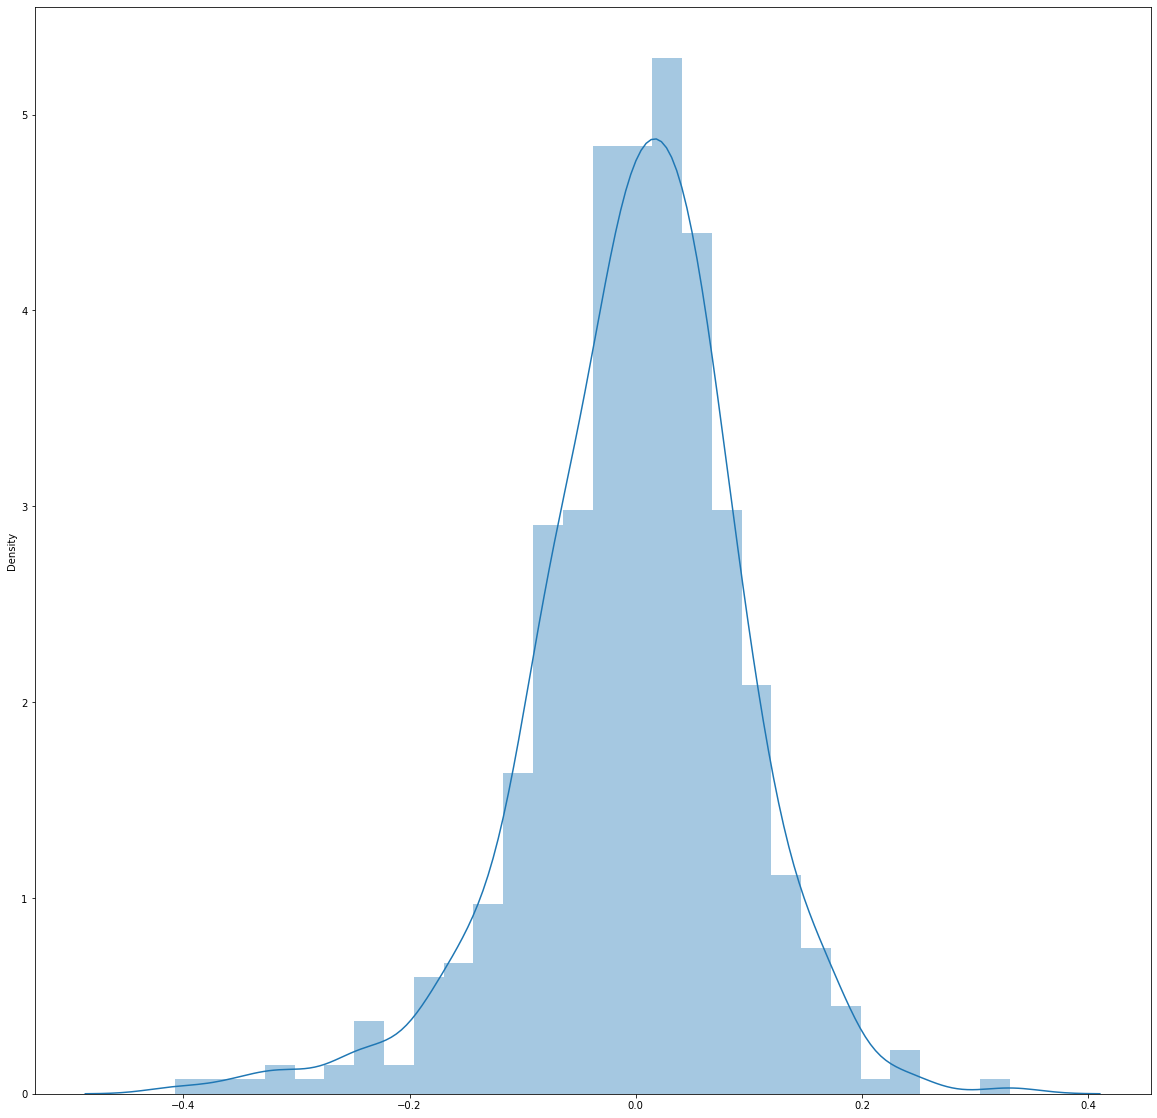

In [ ]:
res = y_train - y_train_pred
sns.distplot(res)

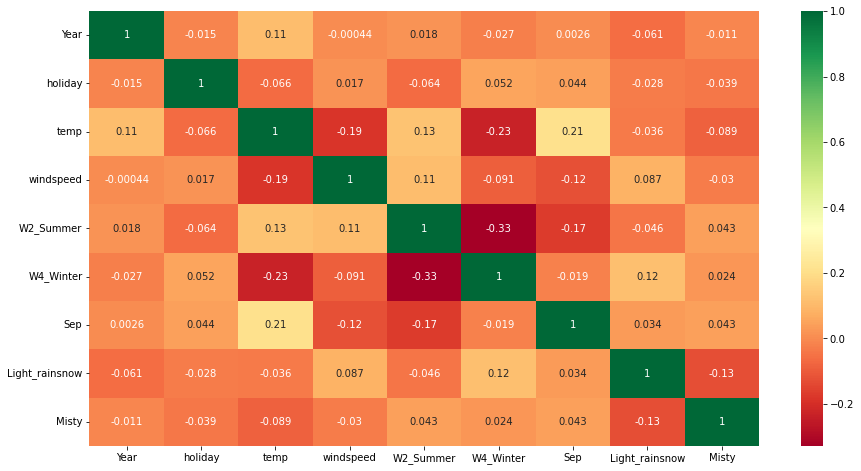

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_Rfe_New.corr(),annot = True, cmap="RdYlGn")
plt.show()

### Linearity

<Figure size 576x576 with 0 Axes>

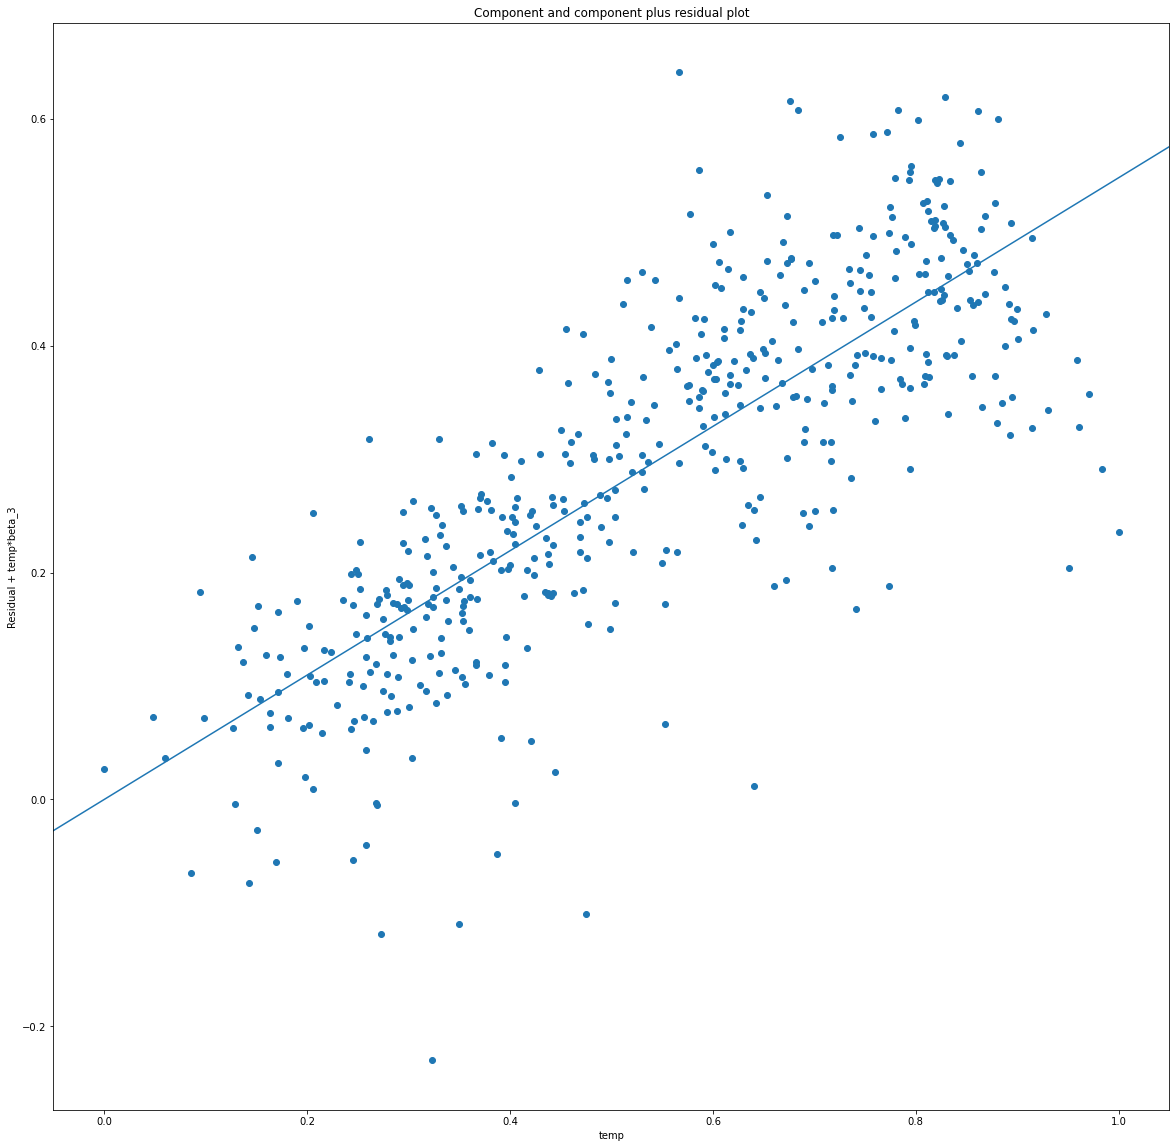

In [ ]:
# Creating Plot Graph for Temp
plt.figure(figsize=(8,8))
sm.graphics.plot_ccpr(lm6, 'temp')
plt.show()

<Figure size 720x720 with 0 Axes>

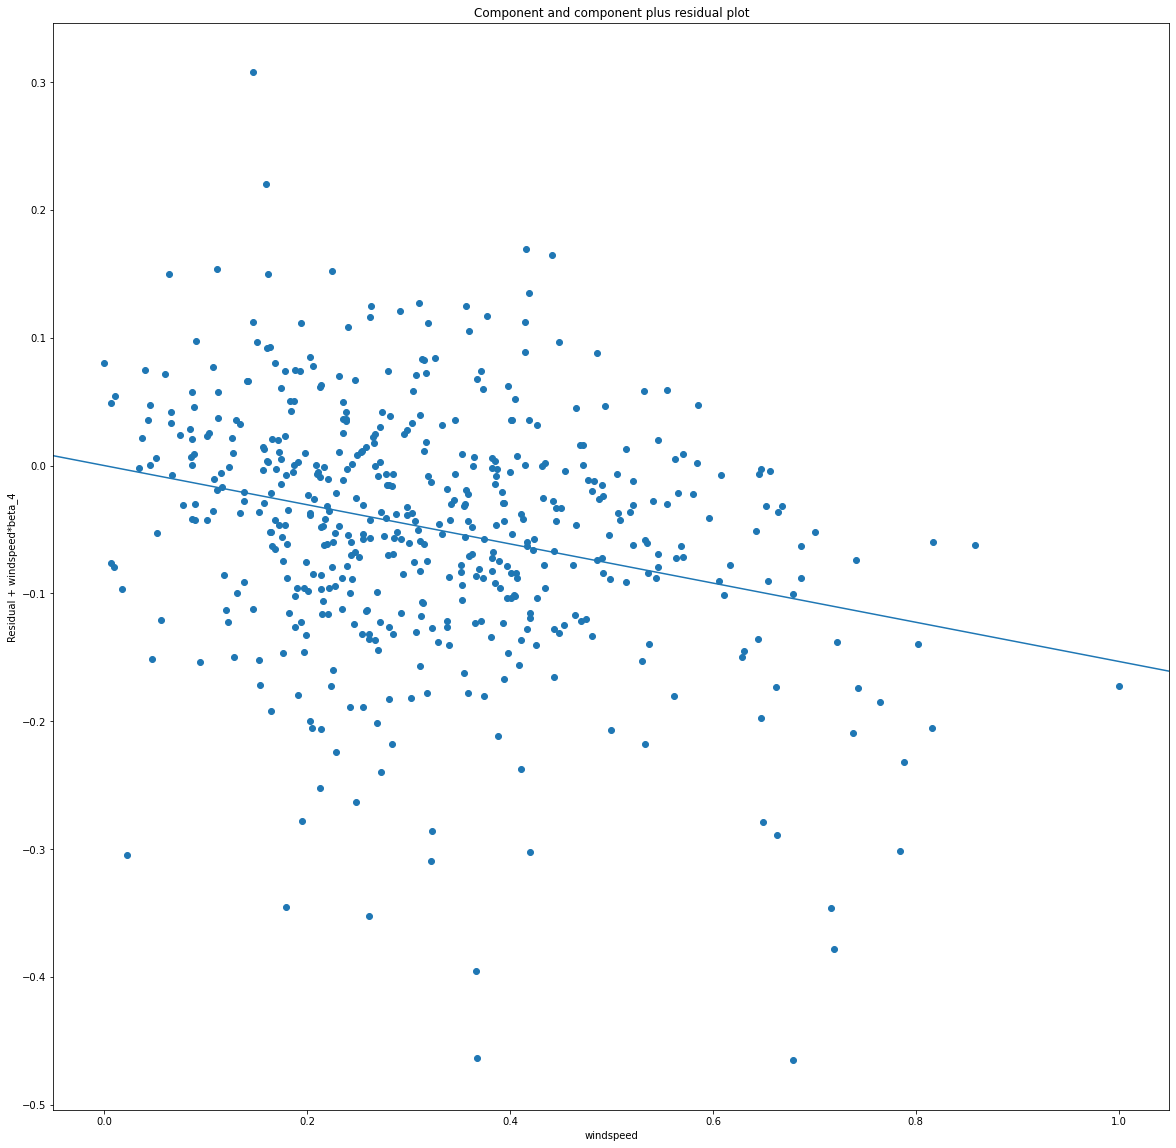

In [ ]:
# Creating Plot Graph for Windspeed
plt.figure(figsize=(10,10))
sm.graphics.plot_ccpr(lm6, 'windspeed')
plt.show()

<Figure size 720x720 with 0 Axes>

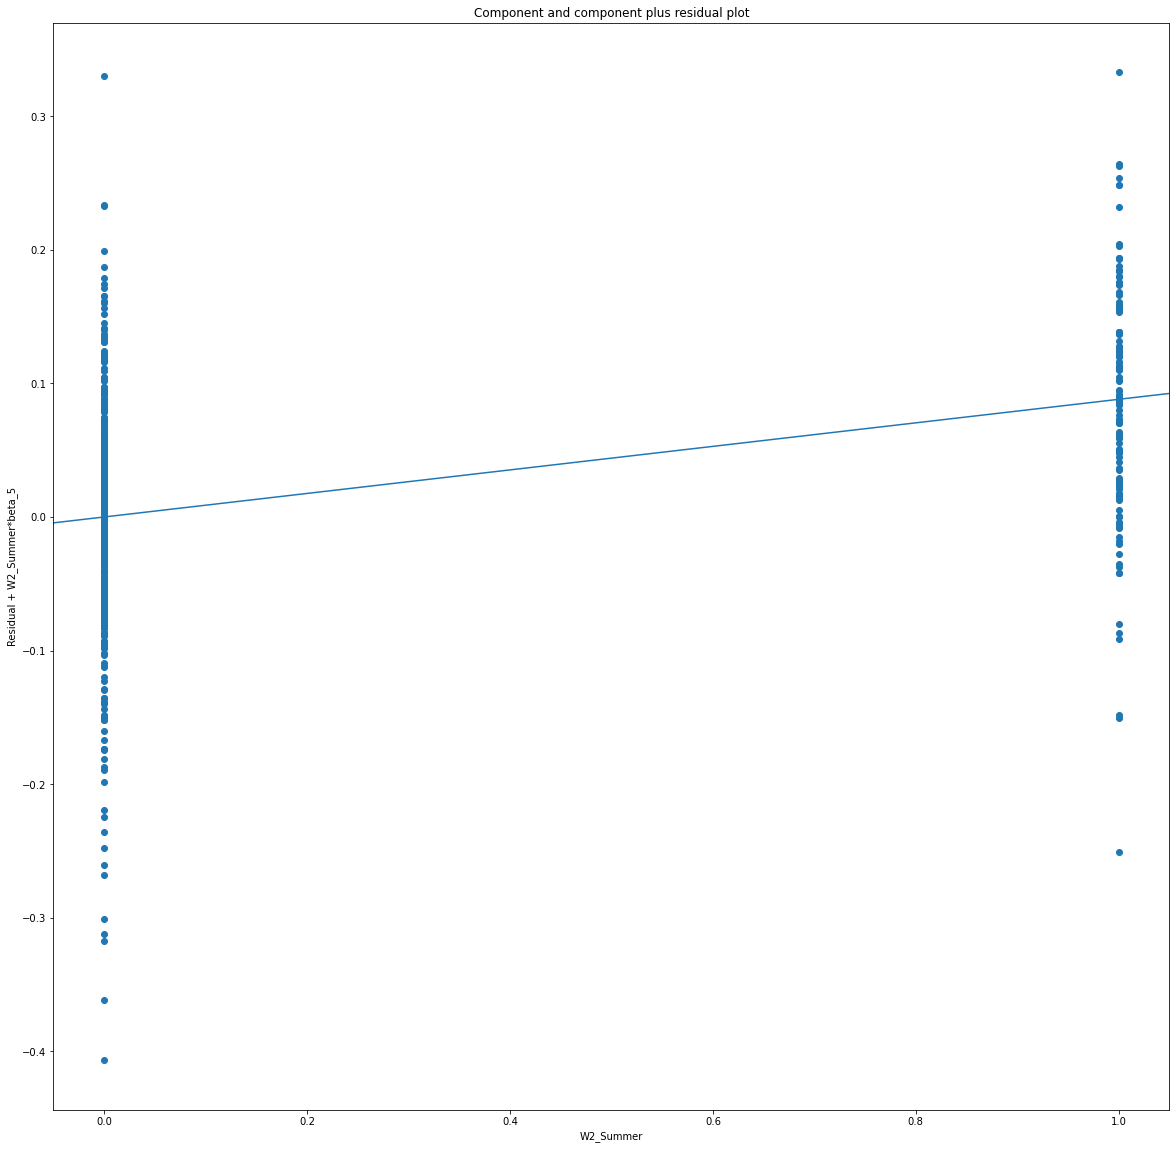

In [ ]:
# Creating Plot Graph for W2_Summer
plt.figure(figsize=(10,10))
sm.graphics.plot_ccpr(lm6, 'W2_Summer')
plt.show()

<Figure size 720x720 with 0 Axes>

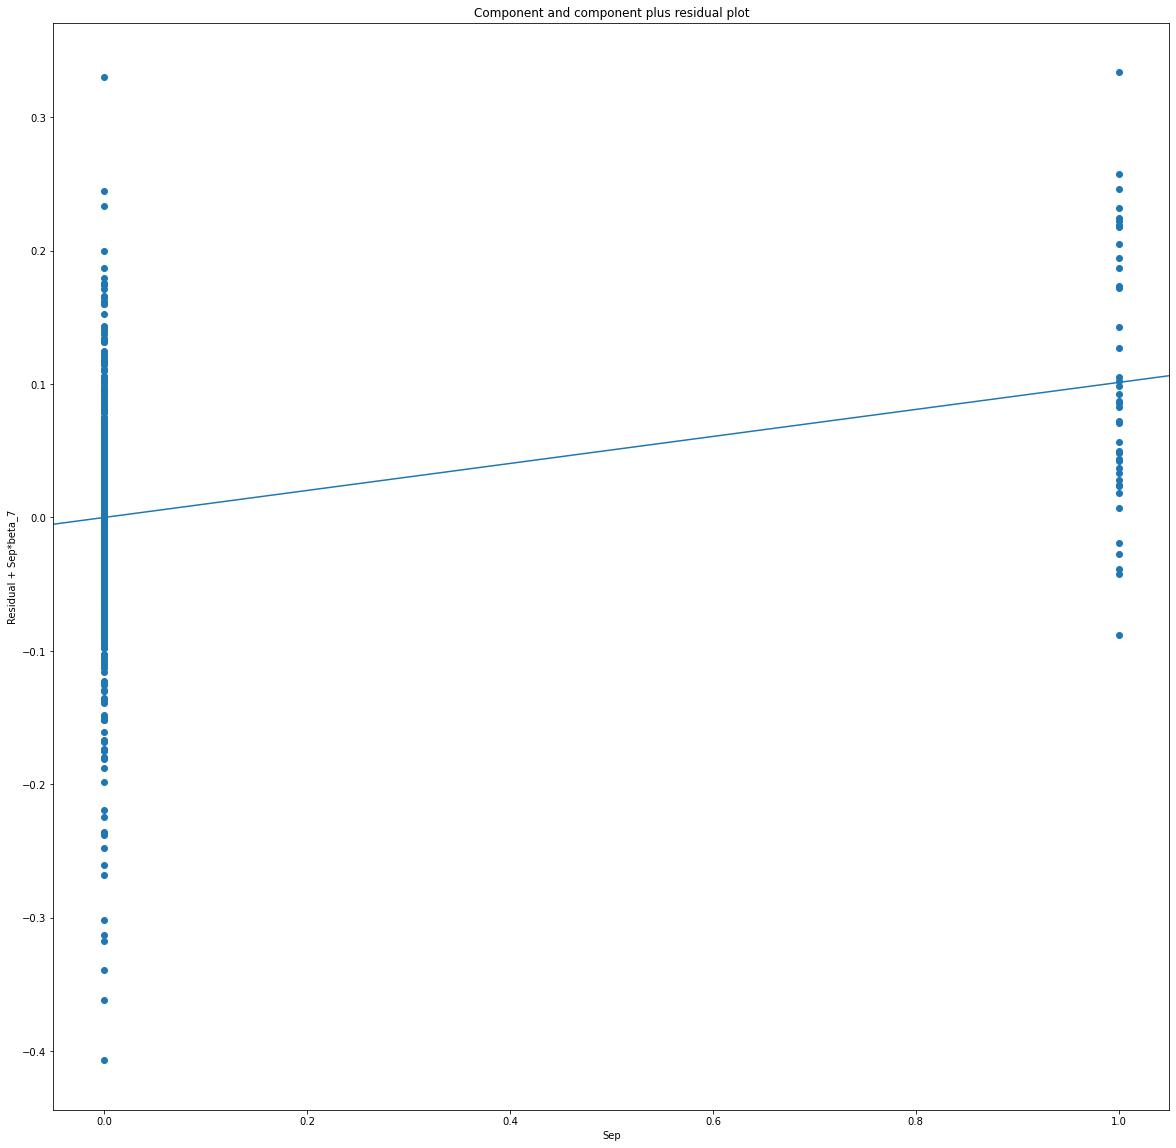

In [ ]:
# Creating Plot Graph for Sep
plt.figure(figsize=(10,10))
sm.graphics.plot_ccpr(lm6, 'Sep')
plt.show()

### Homoscedasticity

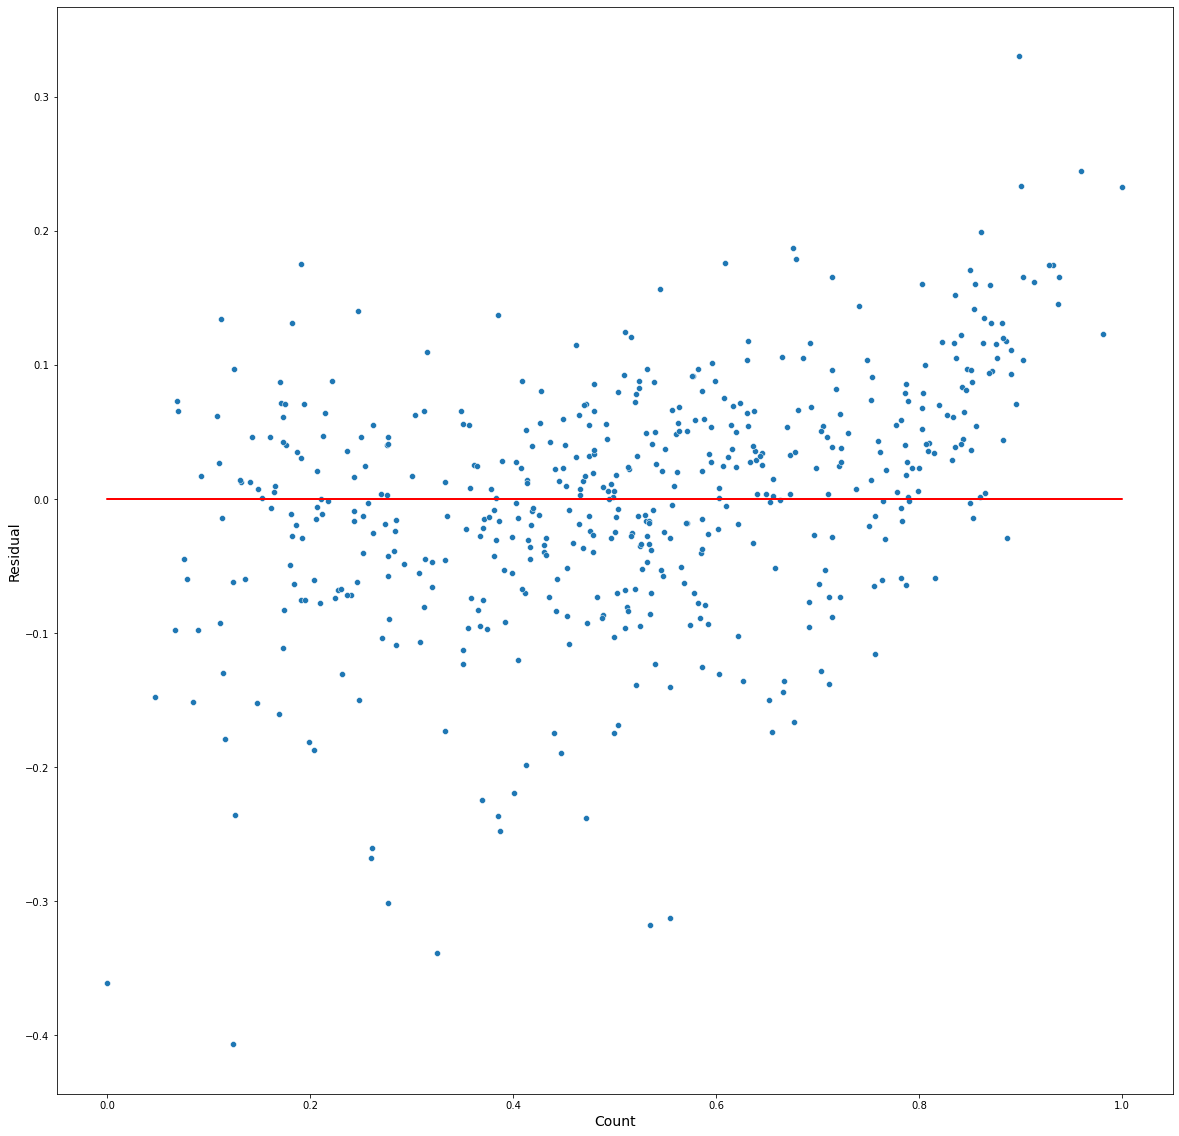

In [ ]:
y_train_pred = lm6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count',fontsize=14)
plt.ylabel('Residual',fontsize=14)
plt.show()

- No patten is visible in above Analysis.
- With Durbin-Watson value being "2.097", no autocorrelation is there.

# Predictions and evaluation on the test set¶

In [ ]:
# fit(): learns xmin, xmax : You can't fit scaler on test set but fit to train set only
# transform(): x-min/xmax - xmin : it should be done test set

# fit_transform()  # it is combination of both above processes

In [ ]:
# Normalization the test data set

# 1. Instantiate\Create an object
scaler = MinMaxScaler()

# Create a list of numeric variables(except Dummy)
num_var = ['temp','TempFeelslike','Humidity','windspeed','Count']


# 2. Fit the data
Data_New_test[num_var] = scaler.fit_transform(Data_New_test[num_var])

Data_New_test.head()

,Year,holiday,workingday,temp,TempFeelslike,Humidity,windspeed,Count,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,mon,sat,sun,thu,tue,wed
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,1,...,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,1,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Checking the description of test dataset
Data_New_test.describe()

,Year,holiday,workingday,temp,TempFeelslike,Humidity,windspeed,Count,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,mon,sat,sun,thu,tue,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.530791,0.508362,0.418803,0.517923,0.263636,0.245455,...,0.086364,0.086364,0.027273,0.318182,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.248645,0.227648,0.200875,0.187683,0.239498,0.441609,0.431338,...,0.281541,0.281541,0.163248,0.466833,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_test = Data_New_test.pop('Count')
X_test = Data_New_test

In [ ]:
Test_column1 = X_train_Rfe_New.columns

X_test = X_test[Test_column1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

In [ ]:
y_pred = lm6.predict(X_test_lm6)

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7853

## Model Evaluation

Text(0, 0.5, 'y_pred')

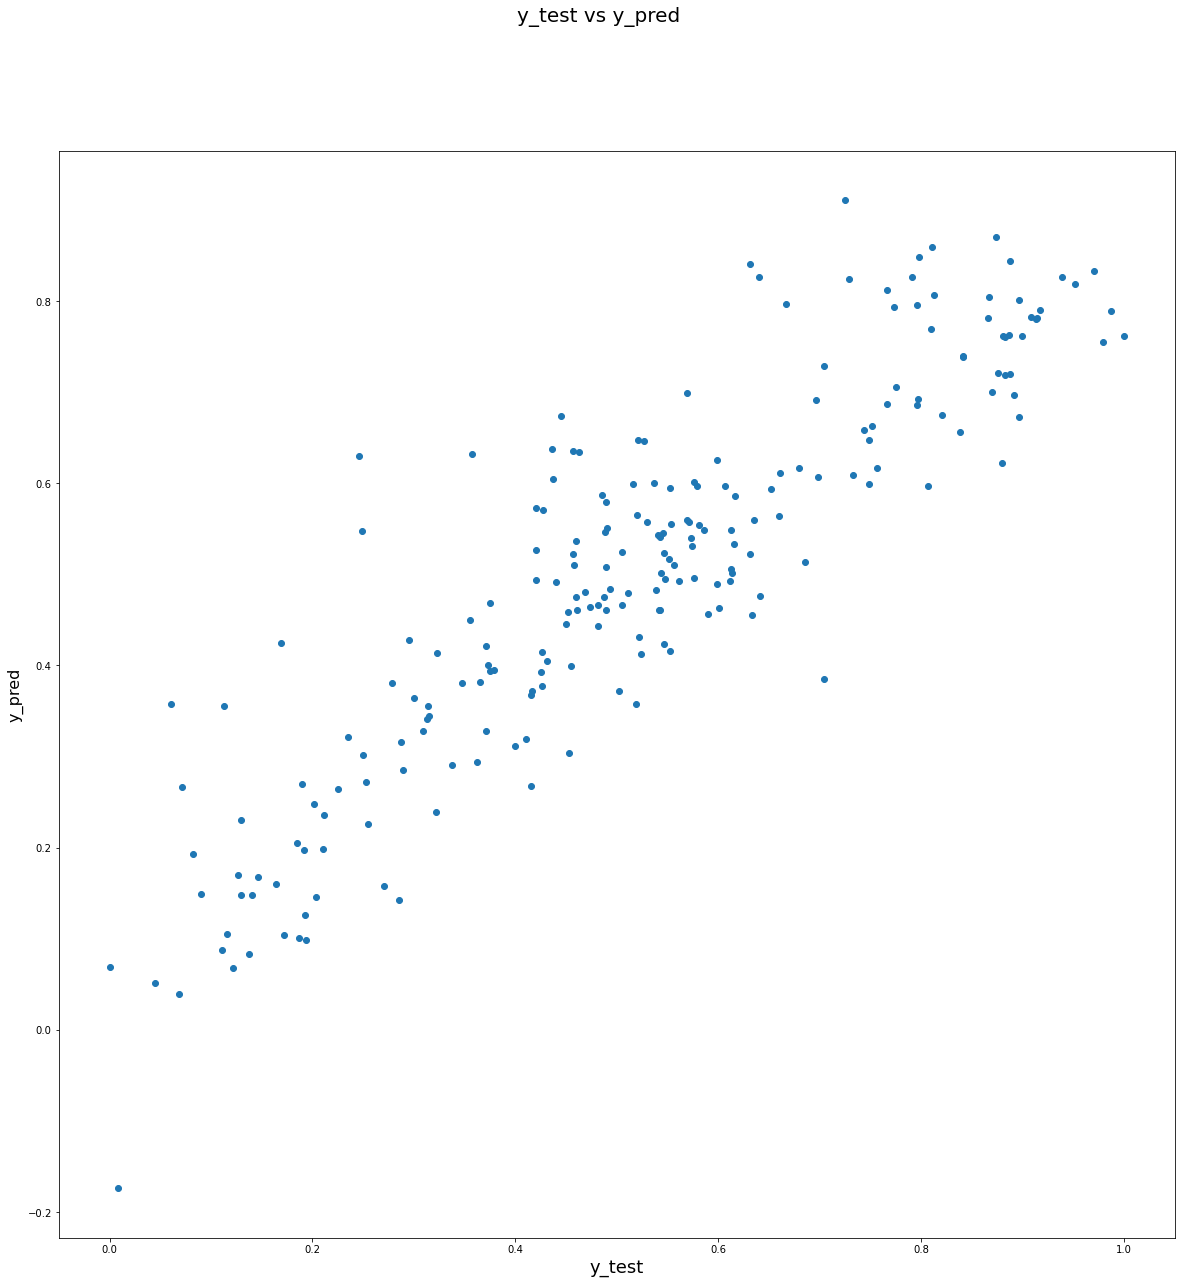

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7761


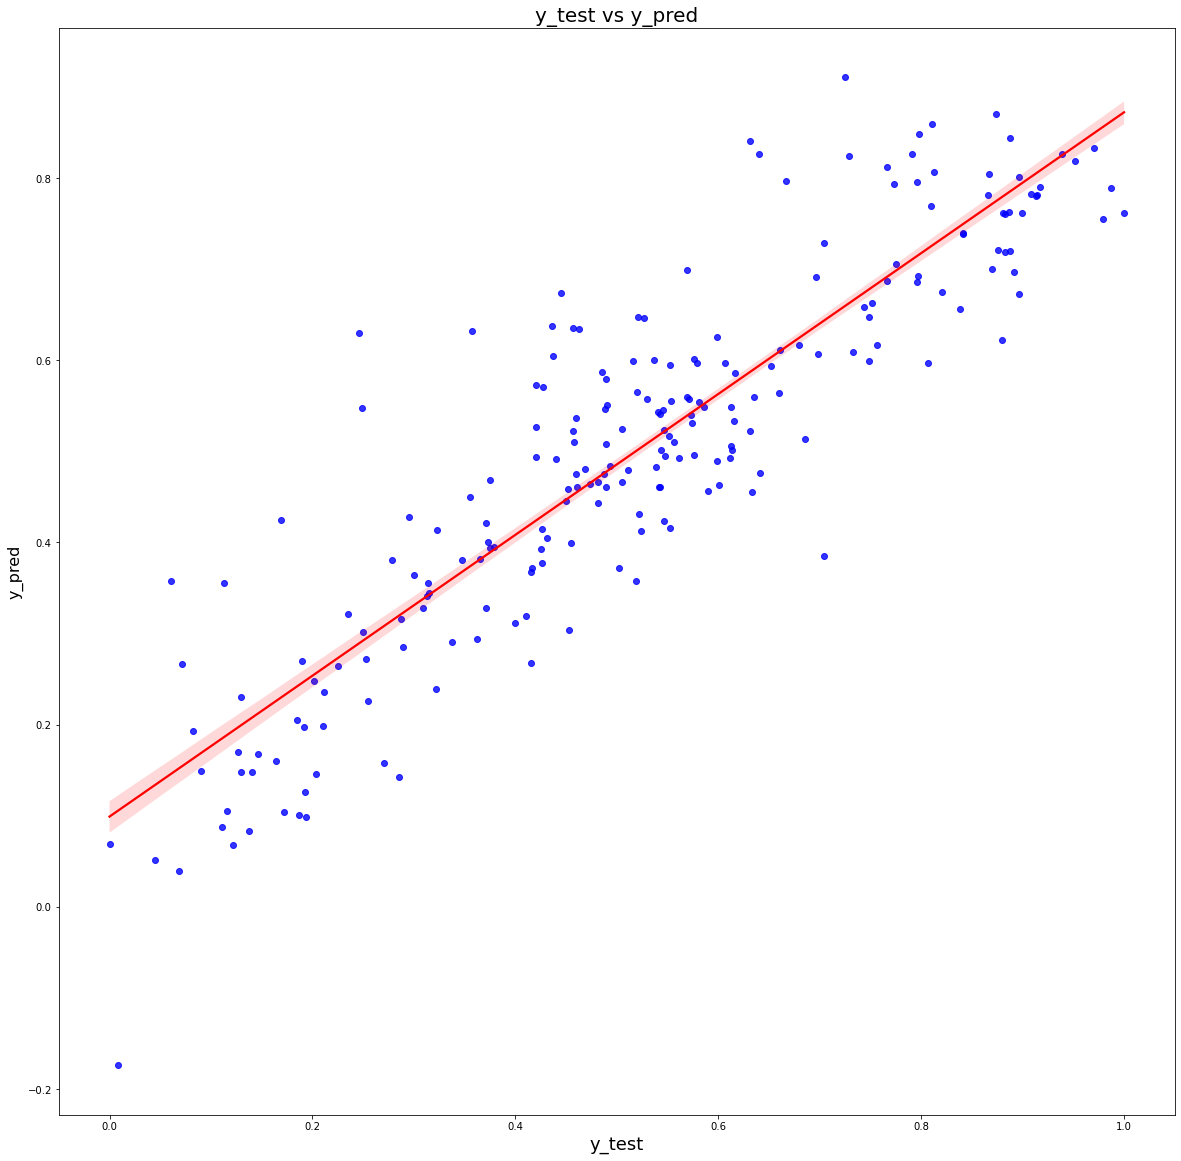

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## R^2 comparsion between Training and Testing dataset

- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.7853
- Train dataset Adjusted R^2 : 0.827    
- Test dataset Adjusted R^2  : 0.7761

## From Model lm6.summary, we can confirm below variables play roles in bikes demand
- Year, we have seen YearOnYear growth in count
- holiday, the count increases when day is a holiday
- temp, it effects count due natural conditions
- windspeed, it effects count due natural conditions
- W2_Summer, it has positive impact on count 
- W4_Winter, it has positive impact on count
- Sep, it is the topper among all months to increase the count
- Light_rainsnow, it lower the count due to increased diffculties in natural conditions
- Misty, it has positive impact on count as it lowers difficulties in natural conditions